# Big Data Analytics - Project - 2021

### Authors: Kirill Holtmann, Lilith Feer, Luca Guenin, Mark Martori Lopez, Remo Hertig
### Matrikel-Nr.: 16722423, 16720799, 16609521, 19759869, 13738323

## Goal Brief
#### The objective of this project is to learn the foundaments of Big Data Analysis and apply them to a big dataset. More precisely with the Cancer Prediction dataset we try to answer the following questions:
#### "Is there any relationship between the genes expressed in the tumor cells? Are certain genes expressed more frequently than others? Can we predict pancreatic cancer with our analysis and the dataset provided?"

## Packages & Libraries

In [41]:
options(warn=0)
#install.packages("BiocManager")
#BiocManager::install("Rgraphviz")
#install.packages("data.table")
#install.packages("dplyr")
#BiocManager::install("outliers")
#BiocManager::install("Hmisc")
#install.packages("Seurat")
BiocManager::install("limma")

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.r-project.org


Bioconductor version 3.12 (BiocManager 1.30.15), R 4.0.4 (2021-02-15)

Installing package(s) 'limma'



package 'limma' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\lilit\AppData\Local\Temp\RtmpgF1Ufg\downloaded_packages


Installation paths not writeable, unable to update packages
  path: C:/Program Files/R/R-4.0.4/library
  packages:
    boot, class, cluster, KernSmooth, lattice, MASS, Matrix, mgcv, nnet,
    spatial, survival

Old packages: 'e1071', 'fansi', 'leiden', 'RcppArmadillo', 'rlang', 'stringi',
  'tibble', 'xfun'



In [1]:
library(ggplot2)
library(data.table)
library("dplyr") 
library(tidyr)
library(Hmisc)
library(corrplot)
library(outliers)
library(limma)
library(Seurat)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: lattice

Loading required package: survival

Loading required package: Formula


Attaching package: ‘Hmisc’


The following objects are masked from ‘package:dplyr’:

    src, summarize


The following objects are masked from ‘package:base’:

    format.pval, units


corrplot 0.87 loaded



ERROR: Error in library(outliers): there is no package called ‘outliers’


## Dataset
### Description:
#### Pancreatic cancer arises from the abnormal and uncontrolled growth of cells in the tissues of the pancreas. Pancreatic adenocarcinoma (PAAD) is the most common type of pancreatic cancer, accounting for approximately 85% of all types of pancreatic cancer. This cancer is the twelfth most common cancer and the seventh leading cause of cancer-related death. [01]

#### The dataset is split into 2 subsets. The patients subset consist of 123 rows (features) such as Adenocarcicoma_invasion or days_to_death and 183 columns ( pancreatic cancer tumor cells from patients ). The expression subset contains around 18.500 normalized RNA Sequencing reads for pancreatic cancer tumors as Rows and the same 183 columns as the first subset. The dataset is transposed for easier understanding and manipulation. The file format is GCT , a tab-delimited file used for sharing gene expression data and metadata (details for each sample) for samples.

### Link:
### https://www.kaggle.com/abhiparashar/cancer-prediction?select=PAAD.gct

### Load:

In [2]:
# - Read in data.table format:                    # Setting Participant ID as column Name -> skip = 3
original_dataset <- fread("Data/PAAD.gct", skip = 3, quote = "", header = TRUE, sep = "\t")

In [3]:
# Dimensions of the dataset
dimensions <- dim(original_dataset)
message("The dimensions of the dataset are: ","Rows = ",dimensions[1] ," and Columns = ",dimensions[2])

# Overview types of Data
#str(original_dataset)

# Patients IDs
patients_IDs <- colnames(original_dataset)

# Features
rownames <- original_dataset[,1]

# Attributes
#attributes(original_dataset)

head(original_dataset,5)

The dimensions of the dataset are: Rows = 18588 and Columns = 184



participant_id,aab1,aab4,aab6,aab8,aab9,aaba,aabe,aabf,aabh,⋯,aauh,aaui,aaul,a8t3,a8t5,a89d,a89d.1,a8sy,a8lh,aapl
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
sample_type,Primary solid Tumor,Primary solid Tumor,Primary solid Tumor,Primary solid Tumor,Primary solid Tumor,Primary solid Tumor,Primary solid Tumor,Primary solid Tumor,Primary solid Tumor,⋯,Primary solid Tumor,Primary solid Tumor,Primary solid Tumor,Primary solid Tumor,Primary solid Tumor,Solid Tissue Normal,Primary solid Tumor,Primary solid Tumor,Primary solid Tumor,Primary solid Tumor
mRNAseq_cluster,1,2,3,1,4,3,3,2,2,⋯,2,5,3,4,5,,2,3,1,5
bcr_patient_barcode,tcga-2j-aab1,tcga-2j-aab4,tcga-2j-aab6,tcga-2j-aab8,tcga-2j-aab9,tcga-2j-aaba,tcga-2j-aabe,tcga-2j-aabf,tcga-2j-aabh,⋯,tcga-xd-aauh,tcga-xd-aaui,tcga-xd-aaul,tcga-xn-a8t3,tcga-xn-a8t5,tcga-yb-a89d,tcga-yb-a89d,tcga-yh-a8sy,tcga-yy-a8lh,tcga-z5-aapl
bcr_patient_uuid,75119d1a-93e5-4ae7-9d60-69ee929a0772,33833131-1482-42d5-9cf5-01cade540234,70797499-16e6-48cc-8ae4-1e692713dad3,2e8f90f4-aed3-43b0-985c-dfdc2581f24f,a5748656-5330-417a-8938-01f69ddb3576,e3a19e63-bae5-498b-9687-41194aa5728d,58c1c391-5ea3-4432-bb1e-e7e1974954bc,886d6116-d496-444f-9b7b-7449dad31055,c53328b4-0930-4e6a-a648-283b5565295e,⋯,b46b5a4c-59fc-4769-b05a-d15f9aaa753a,9a2db69e-d429-45d4-89ca-a2c4e0cfc116,597a5a56-244b-4218-a55d-5d08217ea28c,dd7bcdd8-1660-4dab-9860-9d136c4cee77,382b279f-87e1-4dbc-a2ca-c1dfde1cf254,b84b58c7-95b8-4162-8e61-414f8fe422c6,b84b58c7-95b8-4162-8e61-414f8fe422c6,503d7e36-df78-428d-9971-09ff707645c2,ede2e8a7-465e-4725-880d-519899aba0c0,6a4e10b6-e6c4-4210-ae4d-0d8e8d0cb3ec
vital_status,dead,alive,dead,alive,dead,dead,alive,dead,alive,⋯,alive,dead,alive,alive,alive,alive,alive,alive,alive,alive


### Separate the two data sets (meta data and expression data)

In [4]:
Expression_data <- original_dataset[124:length(original_dataset$participant_id),]
Patient_data <- original_dataset[1:123,]

### Transpose the data sets

In [5]:
transposefunction <- function(dataset){
    rowname <- dataset$participant_id
    colname <- 1:length(original_dataset[1,])
    transposed_dataset <- transpose(dataset)
    rownames(transposed_dataset) <- colname
    colnames(transposed_dataset) <- rowname
    transposed_dataset <- transposed_dataset[2:nrow(transposed_dataset),]
    return(transposed_dataset)
}

t_expression_data <- transposefunction(Expression_data)
t_patient_data <- transposefunction(Patient_data)

dimensions <- dim(t_expression_data)
message("The dimensions of the Expression dataset are: ","Rows = ",dimensions[1] ," and Columns = ",dimensions[2])
dimensions <- dim(t_patient_data)
message("The dimensions of the Patient dataset are: ","Rows = ",dimensions[1] ," and Columns = ",dimensions[2])

The dimensions of the Expression dataset are: Rows = 183 and Columns = 18465

The dimensions of the Patient dataset are: Rows = 183 and Columns = 123



### Missing Values

In [6]:
# Transform the whole dataset into floats
t_expression_data[] <- lapply(t_expression_data, function(x) {as.numeric(as.character(x))})
dimensionsE <- dim(t_expression_data)

# Expression Data Missing Values Analysis
message("Patients subset:")
tablePatients <- table(is.na(t_patient_data))
dimensionsP <- dim(t_patient_data)
summary(is.na(t_patient_data[1:5,1:5]))

# Expression Data Missing Values Analysis
message("Expression subset:")
tableExpression <- table(is.na(t_expression_data))
summary(is.na(t_expression_data[1:5,1:5]))

message("There are ",tableExpression[2]," missing values from ",dimensionsE[1]*dimensionsE[2]," total values in the expression dataset.")
message("There are ",tablePatients[2]," missing values from ",dimensionsP[1]*dimensionsP[2]," total values in the patients dataset.")

Patients subset:



 sample_type     mRNAseq_cluster bcr_patient_barcode bcr_patient_uuid
 Mode :logical   Mode :logical   Mode :logical       Mode :logical   
 FALSE:5         FALSE:5         FALSE:5             FALSE:5         
 vital_status   
 Mode :logical  
 FALSE:5        

Expression subset:



  SLC35E2           A1BG            A1CF           A2BP1        
 Mode :logical   Mode :logical   Mode :logical   Mode :logical  
 FALSE:5         FALSE:5         FALSE:5         FALSE:3        
                                                 TRUE :2        
   A2LD1        
 Mode :logical  
 FALSE:5        
                

There are 134954 missing values from 3379095 total values in the expression dataset.

There are 9654 missing values from 22509 total values in the patients dataset.



### Visualize the 2 pre-processed subsets:

In [15]:
head(t_patient_data,5)

sample_type,mRNAseq_cluster,bcr_patient_barcode,bcr_patient_uuid,vital_status,days_to_death,days_to_last_followup,additional_studies,adenocarcinoma_invasion,age_at_initial_pathologic_diagnosis,...,tobacco_smoking_history,total_dose,total_dose_units,tumor_tissue_site,tumor_type,withdrawn,year_of_dcc_upload,year_of_form_completion,year_of_initial_pathologic_diagnosis,year_of_tobacco_smoking_onset
Primary solid Tumor,1,tcga-2j-aab1,75119d1a-93e5-4ae7-9d60-69ee929a0772,dead,66,NA,NA,yes,65,...,3,NA,NA,pancreas,primary,false,2016,2014,2012,1962
Primary solid Tumor,2,tcga-2j-aab4,33833131-1482-42d5-9cf5-01cade540234,alive,NA,729,NA,yes,48,...,5,NA,NA,pancreas,primary,false,2016,2014,2012,NA
Primary solid Tumor,3,tcga-2j-aab6,70797499-16e6-48cc-8ae4-1e692713dad3,dead,293,NA,NA,yes,75,...,NA,NA,NA,pancreas,primary,false,2016,2014,2012,NA
Primary solid Tumor,1,tcga-2j-aab8,2e8f90f4-aed3-43b0-985c-dfdc2581f24f,alive,NA,80,NA,yes,71,...,NA,NA,NA,pancreas,primary,false,2016,2014,2012,NA
Primary solid Tumor,4,tcga-2j-aab9,a5748656-5330-417a-8938-01f69ddb3576,dead,627,NA,NA,yes,70,...,1,NA,NA,pancreas,primary,false,2016,2014,2012,NA


In [28]:
head(t_expression_data[1:5,1:50])

SLC35E2,A1BG,A1CF,A2BP1,A2LD1,A2ML1,A2M,A4GALT,A4GNT,AAA1,...,ABCA8,ABCA9,ABCB10,ABCB11,ABCB1,ABCB4,ABCB5,ABCB6,ABCB7,ABCB8
7.45,6.4,4.7,-1.0,7.5,6.4,14.3,10.6,8.8,1.0,...,6.9,7.0,8.5,0.5,8.5,5.0,2.8,8.2,8.5,9.5
8.10,5.8,5.7,1.1,6.8,NaN,14.0,10.2,5.6,-1.2,...,6.7,6.7,8.4,0.8,8.8,4.6,-0.2,9.2,8.3,9.4
7.20,6.4,3.0,NaN,7.3,10.8,13.1,10.1,0.2,0.2,...,6.9,5.9,8.4,0.2,6.1,3.7,1.2,8.6,8.2,9.9
8.00,5.8,5.1,NaN,7.5,4.1,13.8,8.6,3.2,-0.1,...,7.7,6.2,8.5,0.9,5.7,5.6,5.2,8.8,8.1,9.6
7.65,6.7,4.4,0.1,7.4,9.3,14.6,10.1,5.7,NaN,...,6.4,7.5,8.5,1.7,9.1,4.0,4.6,8.5,8.7,9.6


### Gene expression EDA 

To check the gene expression data for obvious data error, we plot the histograms for the minima and maximas for each gene. From these plots we see that the expression values are within biologically reasonable ranges.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


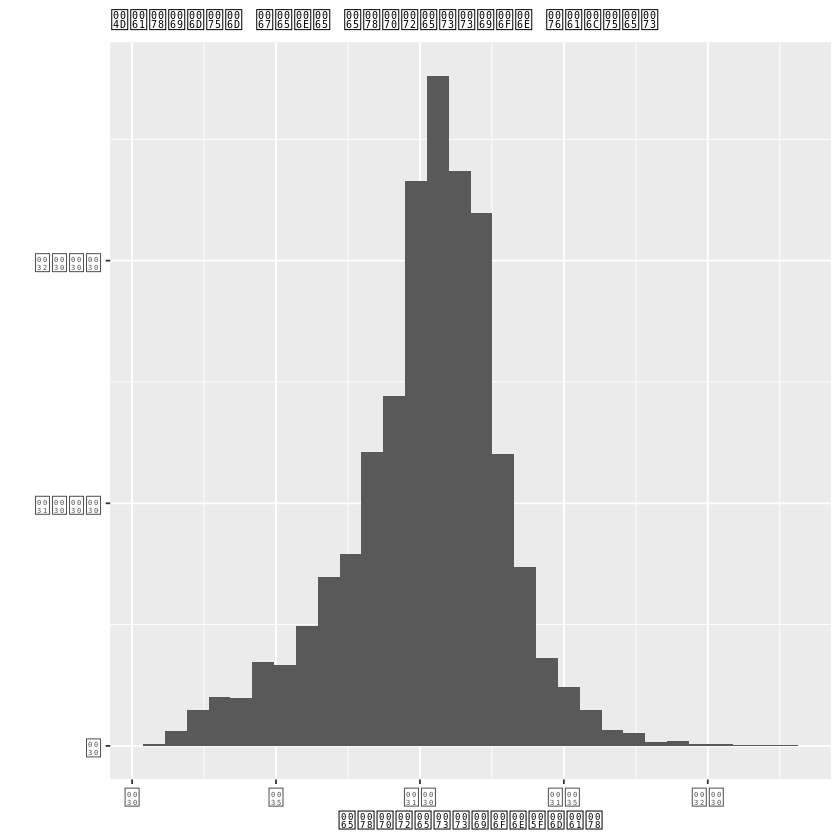

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


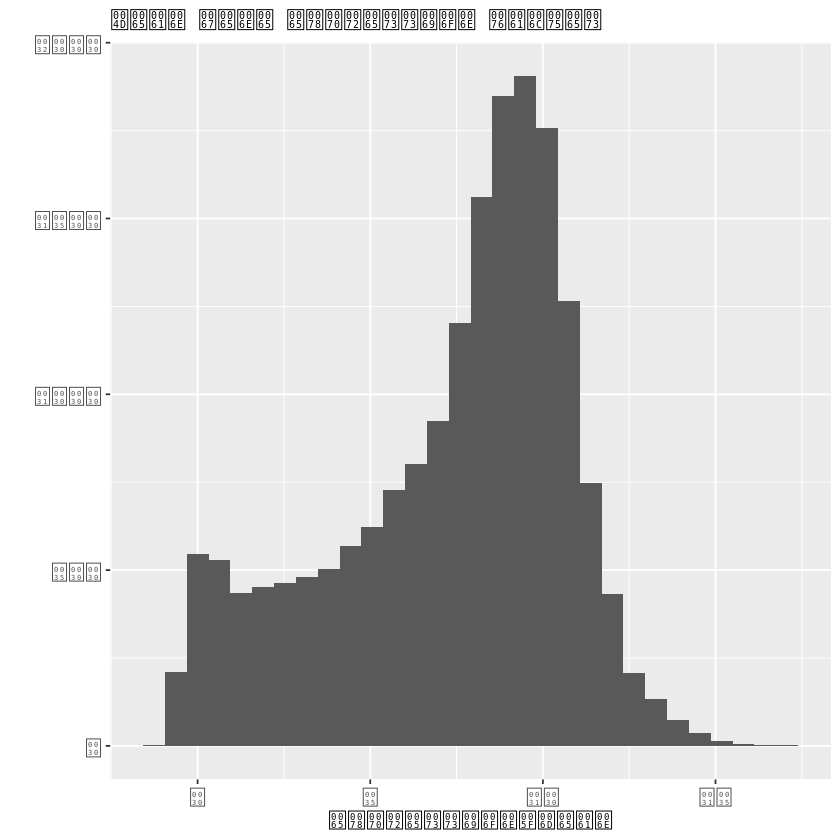

[1] "Mean value found: 4.284739 "

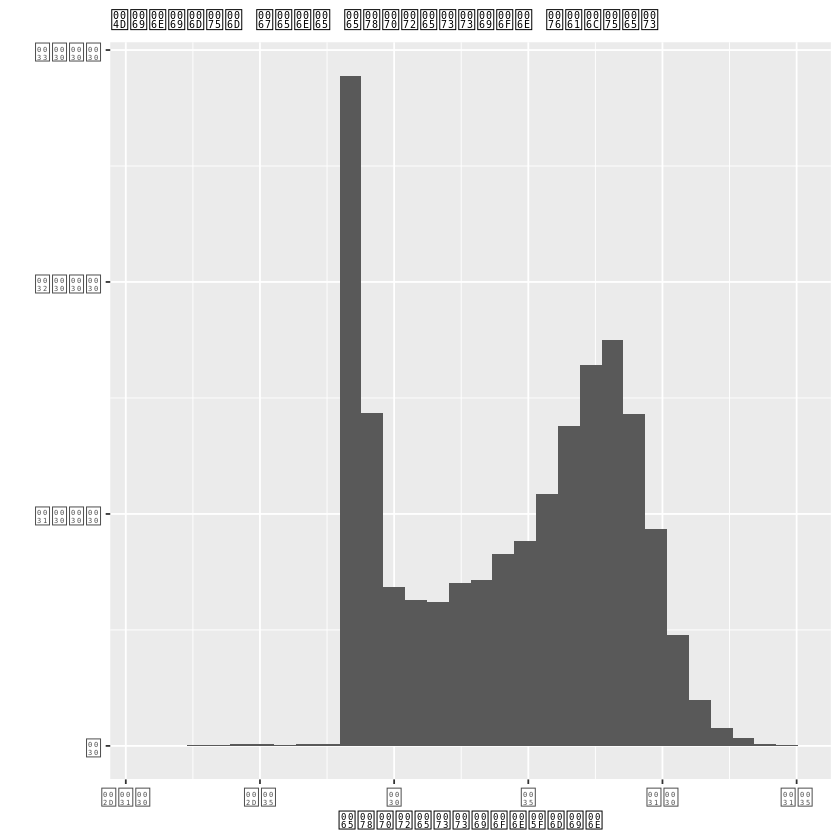

In [34]:
expression_max <- sapply(t_expression_data, max, na.rm=T)
qplot(expression_max, main="Maximum gene expression values")+theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
        panel.background = element_blank(), axis.line = element_line(colour = "black"))

expression_mean <- sapply(t_expression_data, mean, na.rm=T)
qplot(expression_mean, main="Mean gene expression values")+ theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
        panel.background = element_blank(), axis.line = element_line(colour = "black"))

expression_min <- sapply(t_expression_data, min, na.rm=T)
qplot(expression_min, main="Minimum gene expression values") + theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
        panel.background = element_blank(), axis.line = element_line(colour = "black"))

meanE <- mean(expression_min)
sprintf("Mean value found: %f ",meanE)

### Grubbs Test: Check for outliers and Histograms visualization.
If the p-value is less than the chosen significance threshold (generally α = 0.05) then the null hypothesis is rejected and we will conclude that the lowest/highest value is an outlier.


In [86]:
outlier_fun <- function(df){
  for (columnindex in 1:ncol(df)){
      hist(data.matrix(df[,..columnindex]))
      print(grubbs.test(data.matrix(df[,..columnindex])))
  }
}
#outlier_fun(t_expression_data)

#### From the histograms above we can see that all the outliers identified with the grubbs test are in a plausible range. As a consequence, we decided to leave them in the dataset

## Patient meta data histograms 

### Numeric columns

We investigate and clean up the numeric data part of the patient data

In [29]:
t_patient_data <- t_patient_data %>%
    mutate_all(type.convert) %>%
    mutate_if(is.factor, as.character)

# only numeric values
df_patient_num <-  t_patient_data %>% select_if(is.numeric)

sprintf("Initially: %d numeric columns",ncol(df_patient_num))

# columns without any variance
which(apply(df_patient_num,2,sd)==0)

# remove dcc columns because they are all the same and refer to the upload of the dataset?

df_patient_num <- df_patient_num %>% select(-day_of_dcc_upload, -month_of_dcc_upload, -year_of_dcc_upload)


# days_to_index,days_to_initial_pathologic_diagnosis, number_of_lymphnodes_positive_by_ihc  is 0 or NA
df_patient_num <- df_patient_num %>% select(-days_to_index, -days_to_initial_pathologic_diagnosis, -number_of_lymphnodes_positive_by_ihc)


#system_version is 6 or 7, for our analysis not relevant
df_patient_num <- df_patient_num %>% select(-system_version)

sprintf("Final: %d numeric columns",ncol(df_patient_num))
#df_patient_num$system_version


[1] "Initially: 28 numeric columns"

day_of_dcc_upload month_of_dcc_upload  year_of_dcc_upload 
                  6                  17                  25

[1] "Final: 21 numeric columns"

In [30]:
head(df_patient_num)

mRNAseq_cluster,days_to_death,days_to_last_followup,age_at_initial_pathologic_diagnosis,amount_of_alcohol_consumption_per_day,day_of_form_completion,days_to_birth,days_to_diabetes_onset,days_to_pancreatitis_onset,frequency_of_alcohol_consumption,...,lymph_node_examined_count,maximum_tumor_dimension,month_of_form_completion,number_of_lymphnodes_positive_by_he,number_pack_years_smoked,stopped_smoking_year,tobacco_smoking_history,year_of_form_completion,year_of_initial_pathologic_diagnosis,year_of_tobacco_smoking_onset
1,66,NA,65,1,5,-23962,NA,NA,3,...,22,4.5,7,7,25,1988,3,2014,2012,1962
2,NA,729,48,NA,16,-17794,NA,-292,NA,...,34,6.8,7,0,NA,NA,5,2014,2012,NA
3,293,NA,75,NA,5,-27600,NA,NA,NA,...,18,5.0,7,0,NA,NA,NA,2014,2012,NA
1,NA,80,71,NA,16,-26028,NA,NA,NA,...,27,3.5,7,3,NA,NA,NA,2014,2012,NA
4,627,NA,70,1,5,-25920,NA,NA,3,...,37,4.0,8,6,NA,NA,1,2014,2012,NA
3,607,NA,55,NA,16,-20133,NA,-18029,NA,...,22,4.3,7,2,51,NA,5,2014,2012,NA


Warning message:
"Removed 680 rows containing non-finite values (stat_bin)."


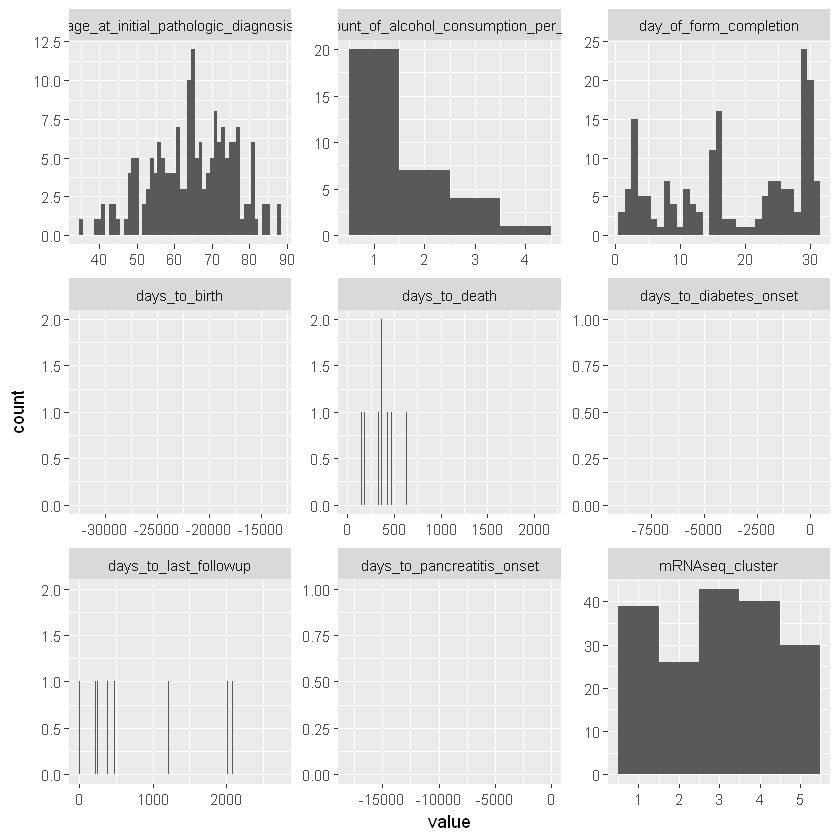

In [17]:
ggplot(gather(df_patient_num[,1:9], cols, value), aes(x = value)) + 
       geom_histogram(binwidth = 1) + facet_wrap(.~cols, scales = "free") + theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
        panel.background = element_blank(), axis.line = element_line(colour = "black"))

The main insight from the previous graphs would be that this pathology is most commonly deteced at an age between 60 and 70 years old. In addition, it is also mostly  increasing in age.  

Warning message:
"Removed 136 rows containing non-finite values (stat_bin)."


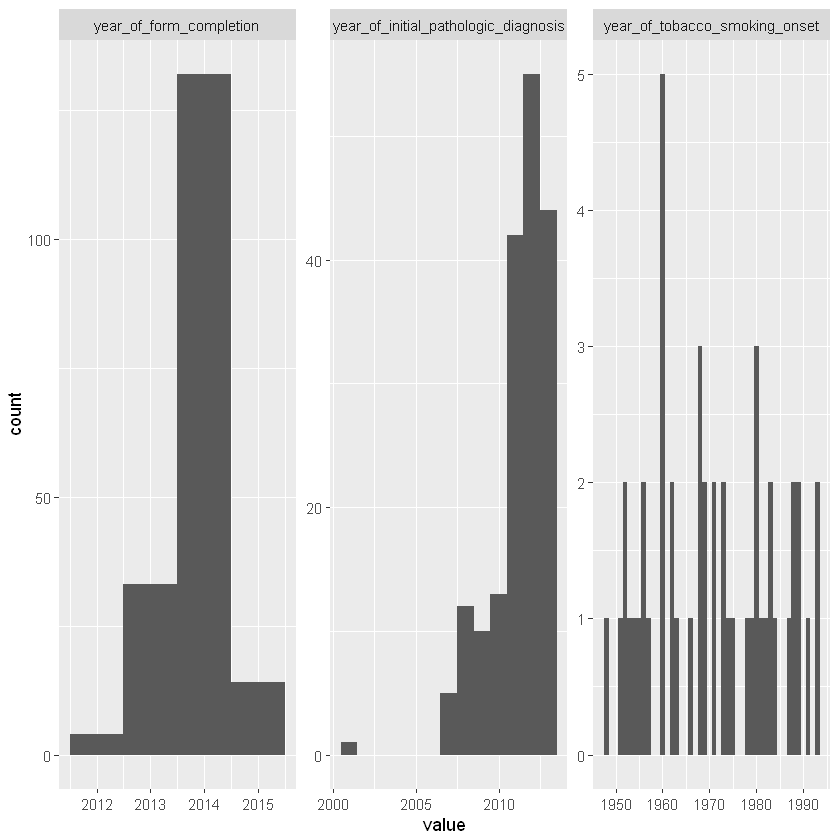

In [18]:
ggplot(gather(df_patient_num[,19:21], cols, value), aes(x = value)) + 
       geom_histogram(binwidth = 1) + facet_wrap(.~cols, scales = "free") 

A critical question that one might wonder is whether the mortality rate varies with age. The following plot provides evidence that it is unlikely to be the case. More specifically, we do not observe any strong dependence on age.

In [ ]:
df_transpose <- transpose(Patient_data)
# set first row as names 
df_transpose  <- df_transpose %>%
  row_to_names(row_number = 1, remove_rows_above = TRUE)
# Vital Status and Age
ggplot(df_transpose, 
       aes(y = vital_status, 
           x = age_at_initial_pathologic_diagnosis)) +
  geom_point() + scale_x_discrete(breaks=seq(35,90,10)) + 
  theme(panel.grid.major = element_blank(), 
                       panel.grid.minor = element_blank(),
                      panel.background = element_blank(), 
                      axis.line = element_line(colour = "black"))+ 
  xlab("Age") + ylab("Vital Status") + labs(title = "Vital Status by Age")

## Correlations - Pearson - Patients Data

In [19]:
corrPatient <- rcorr(as.matrix(df_patient_num))

#corrPatient_plot <- cor(as.matrix(df_patient_num), use="pairwise.complete.obs")

#corrPatient_plot[is.na(corrPatient_plot)] <- 0

head(corrPatient,5) # NA Values transformed to 0. For plotting purposes.

Warning message in sqrt(npair - 2):
"NaNs wurden erzeugt"


,mRNAseq_cluster,days_to_death,days_to_last_followup,age_at_initial_pathologic_diagnosis,amount_of_alcohol_consumption_per_day,day_of_form_completion,days_to_birth,days_to_diabetes_onset,days_to_pancreatitis_onset,frequency_of_alcohol_consumption,...,lymph_node_examined_count,maximum_tumor_dimension,month_of_form_completion,number_of_lymphnodes_positive_by_he,number_pack_years_smoked,stopped_smoking_year,tobacco_smoking_history,year_of_form_completion,year_of_initial_pathologic_diagnosis,year_of_tobacco_smoking_onset
mRNAseq_cluster,1.00000000,0.19566185,-0.2485859,-0.05302266,-0.22478938,-0.04774432,0.05181841,0.5368604,-0.02213471,-0.3373452,...,0.11125947,-0.14869485,0.02276224,0.13340154,-0.05610128,0.09769757,0.06950063,-0.11297992,0.04793358,0.127098028
days_to_death,0.19566185,1.00000000,0.0000000,-0.05798936,-0.33082062,-0.12529848,0.05706725,-0.7325000,-0.50087807,-0.3985462,...,-0.05078277,-0.08498309,0.05476262,-0.14506504,-0.03603833,0.16798827,0.17013852,0.05143176,-0.57039285,0.058129242
days_to_last_followup,-0.24858588,0.00000000,1.0000000,-0.27138071,0.01645460,0.26085024,0.26978703,-0.1022748,-0.26066382,0.3856639,...,0.10781905,0.08678551,0.29091122,-0.03707017,0.24780720,0.14299741,0.05108127,0.15500026,-0.71743794,-0.004843835
age_at_initial_pathologic_diagnosis,-0.05302266,-0.05798936,-0.2713807,1.00000000,-0.02386114,0.04946877,-0.99965938,-0.1354684,0.14982529,0.2274241,...,-0.11952082,0.05258912,-0.14660688,-0.03106103,-0.07286694,-0.51431132,-0.03124219,0.01208075,0.10443294,-0.712470516
amount_of_alcohol_consumption_per_day,-0.22478938,-0.33082062,0.0164546,-0.02386114,1.00000000,0.18573914,0.02553868,0.2970082,0.07869078,0.2978514,...,0.32325765,0.24967183,-0.01705986,0.26232743,0.27597172,-0.04660656,-0.08658153,0.08496278,-0.08622419,-0.335967310


In [20]:
which(apply(df_patient_num,2,sd)==0)

named integer(0)

In [21]:
dpn_na <- df_patient_num %>%  summarise_all(funs(sum(!is.na(.))))
t(dpn_na)

Warning message:
"`funs()` was deprecated in dplyr 0.8.0.
Please use a list of either functions or lambdas: 

  # Simple named list: 
  list(mean = mean, median = median)

  # Auto named with `tibble::lst()`: 
  tibble::lst(mean, median)

  # Using lambdas
  list(~ mean(., trim = .2), ~ median(., na.rm = TRUE))
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated."


mRNAseq_cluster,178
days_to_death,95
days_to_last_followup,88
age_at_initial_pathologic_diagnosis,183
amount_of_alcohol_consumption_per_day,32
day_of_form_completion,183
days_to_birth,183
days_to_diabetes_onset,14
days_to_pancreatitis_onset,11
frequency_of_alcohol_consumption,33
icd_o_3_histology,183


In [22]:
#complete.cases(dfm)
#dfm

In [23]:
# This function returns a Table with Rownames, Colnames, Correlation Coefficient, p-value
flattenCorrMatrix <- function(cormat, pmat) {
  ut <- upper.tri(cormat)
  data.frame(
    row = rownames(cormat)[row(cormat)[ut]],
    column = rownames(cormat)[col(cormat)[ut]],
    cor  =(cormat)[ut],
    p = pmat[ut]
    )
}

### Table of correlations

In [24]:
# Visualize Correlation - Table

dffc <- flattenCorrMatrix(corrPatient$r, corrPatient$P)
dffc

row,column,cor,p
<chr>,<chr>,<dbl>,<dbl>
mRNAseq_cluster,days_to_death,0.19566185,0.06016458
mRNAseq_cluster,days_to_last_followup,-0.24858588,0.02178754
days_to_death,days_to_last_followup,NA,NaN
mRNAseq_cluster,age_at_initial_pathologic_diagnosis,-0.05302266,0.48210479
days_to_death,age_at_initial_pathologic_diagnosis,-0.05798936,0.57670918
days_to_last_followup,age_at_initial_pathologic_diagnosis,-0.27138071,0.01054076
mRNAseq_cluster,amount_of_alcohol_consumption_per_day,-0.22478938,0.22407038
days_to_death,amount_of_alcohol_consumption_per_day,-0.33082062,0.17994780
days_to_last_followup,amount_of_alcohol_consumption_per_day,0.01645460,0.95547697


### Plot

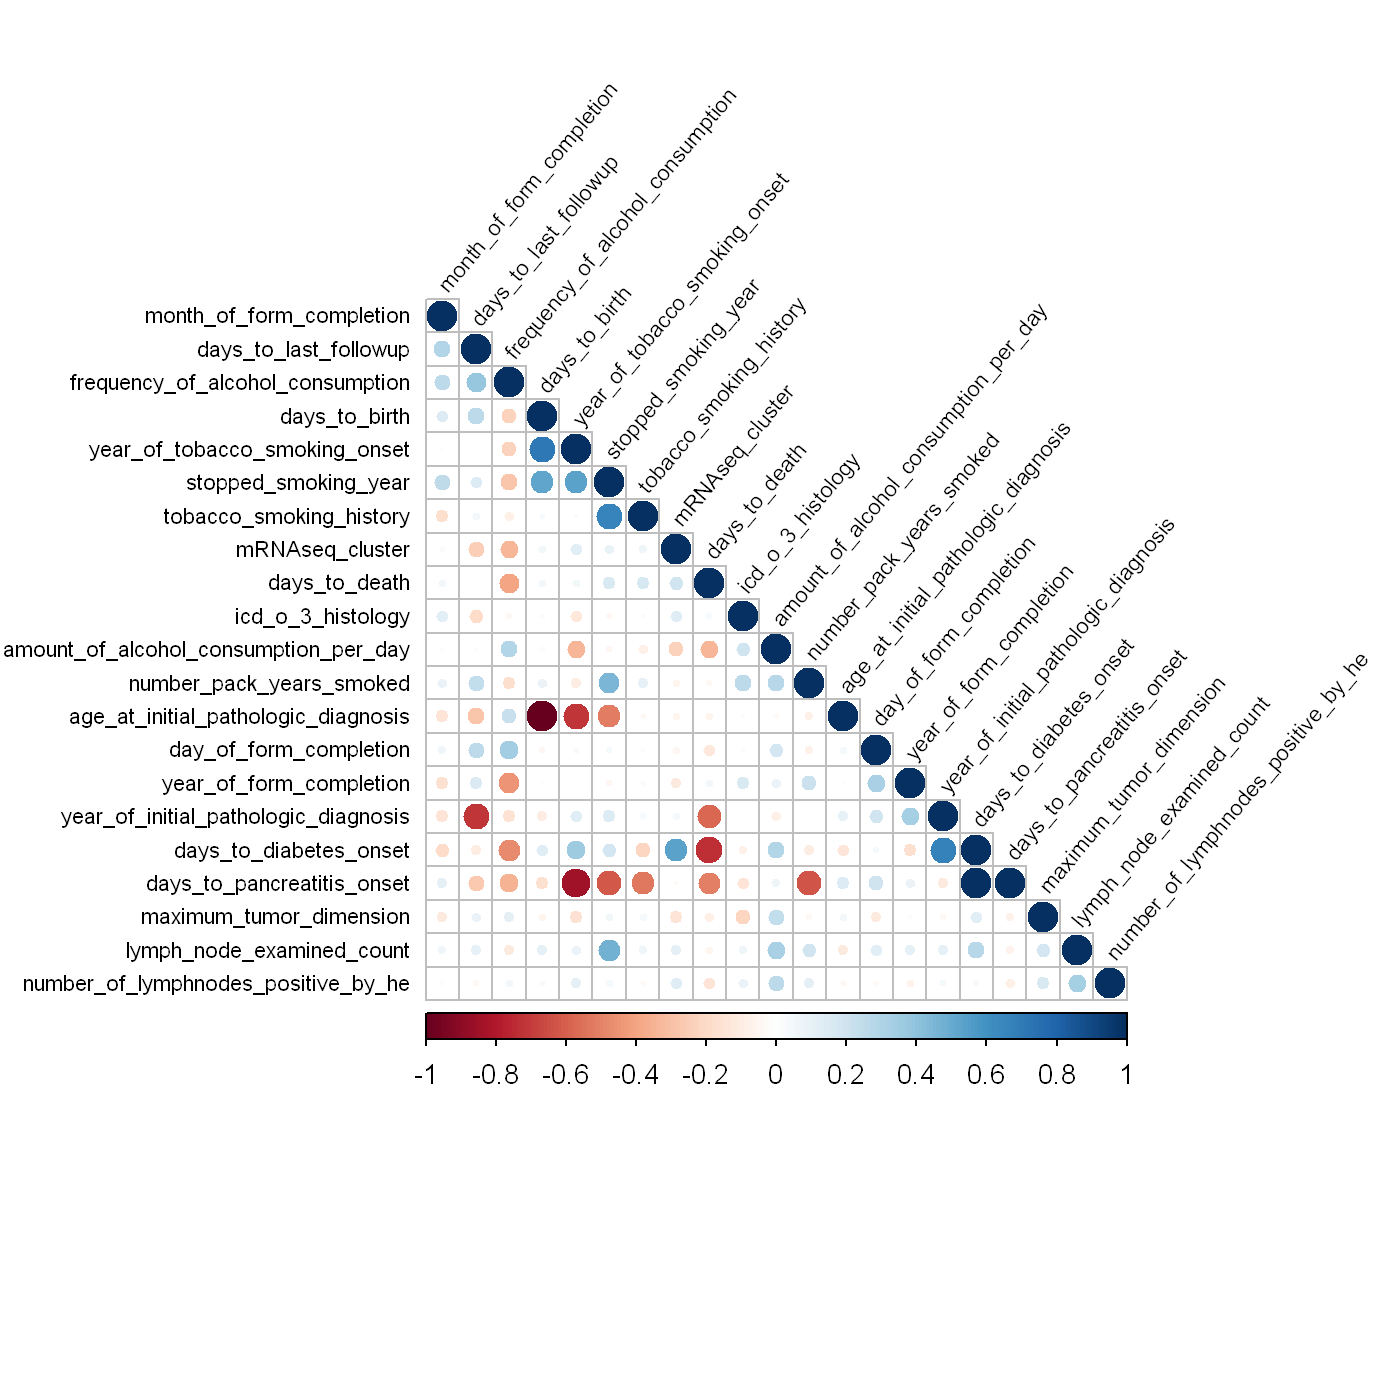

In [25]:
options(jupyter.plot_scale=1, repr.plot.res = 200)
#options(repr.plot.width = 30, repr.plot.height = 30.75, repr.plot.res = 100)

corrplot(corrPatient_plot, type = "lower", order = "hclust", 
         tl.col = "black", tl.srt = 50, tl.cex=0.65)

### Detailed correlation analysis
For a more detailed anaylsis we seperate the dataset into those patient who are still alive and those who are deceased.
Some variables make only sense for these subgroups such as days_to_last_followup and days_to_death which are mutually exclusive

We further remove the variables days_to_pancreatitis_onset and days_to_diabetes_onset because there are too many NaN in these variables


In [26]:
df_patient_relevant <- t_patient_data %>% select(-day_of_dcc_upload, -month_of_dcc_upload, -year_of_dcc_upload, -days_to_index, -days_to_initial_pathologic_diagnosis, -number_of_lymphnodes_positive_by_ihc,-system_version)


# not enough non NaN in these two variables
df_patient_relevant <- df_patient_relevant %>% select(-days_to_diabetes_onset, -days_to_pancreatitis_onset)

df_patient_dead <-  df_patient_relevant %>% filter(vital_status == 'dead') %>% select_if(is.numeric) %>% select(-days_to_last_followup)
head(df_patient_dead)

df_patient_alive <-  df_patient_relevant %>% filter(vital_status == 'alive') %>% select_if(is.numeric) %>% select(-days_to_death)
head(df_patient_alive)

mRNAseq_cluster,days_to_death,age_at_initial_pathologic_diagnosis,amount_of_alcohol_consumption_per_day,day_of_form_completion,days_to_birth,frequency_of_alcohol_consumption,icd_o_3_histology,lymph_node_examined_count,maximum_tumor_dimension,month_of_form_completion,number_of_lymphnodes_positive_by_he,number_pack_years_smoked,stopped_smoking_year,tobacco_smoking_history,year_of_form_completion,year_of_initial_pathologic_diagnosis,year_of_tobacco_smoking_onset
<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,66,65,1,5,-23962,3,8480,22,4.5,7,7,25.0,1988,3,2014,2012,1962
3,293,75,NA,5,-27600,NA,8500,18,5.0,7,0,NA,NA,NA,2014,2012,NA
4,627,70,1,5,-25920,3,8500,37,4.0,8,6,NA,NA,1,2014,2012,NA
3,607,55,NA,16,-20133,NA,8500,22,4.3,7,2,51.0,NA,5,2014,2012,NA
2,691,73,1,16,-26936,3,8500,18,3.2,7,4,7.5,1965,3,2014,2012,1960
3,277,56,1,5,-20641,7,8500,28,3.3,7,2,NA,NA,1,2014,2012,NA


mRNAseq_cluster,days_to_last_followup,age_at_initial_pathologic_diagnosis,amount_of_alcohol_consumption_per_day,day_of_form_completion,days_to_birth,frequency_of_alcohol_consumption,icd_o_3_histology,lymph_node_examined_count,maximum_tumor_dimension,month_of_form_completion,number_of_lymphnodes_positive_by_he,number_pack_years_smoked,stopped_smoking_year,tobacco_smoking_history,year_of_form_completion,year_of_initial_pathologic_diagnosis,year_of_tobacco_smoking_onset
<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>
2,729,48,NA,16,-17794,NA,8140,34,6.8,7,0,NA,NA,5,2014,2012,NA
1,80,71,NA,16,-26028,NA,8500,27,3.5,7,3,NA,NA,NA,2014,2012,NA
3,676,73,1,16,-26943,3.0,8500,24,5.8,7,0,2.2,1970,3,2014,2012,1960
2,1287,61,NA,15,-22425,NA,8140,8,2.2,9,0,NA,NA,1,2014,2011,NA
3,969,55,1,16,-20316,0.5,8140,19,3.5,7,0,42.0,2004,4,2014,2011,1973
2,484,71,NA,16,-26188,NA,8500,19,2.8,7,2,NA,NA,NA,2014,2012,NA


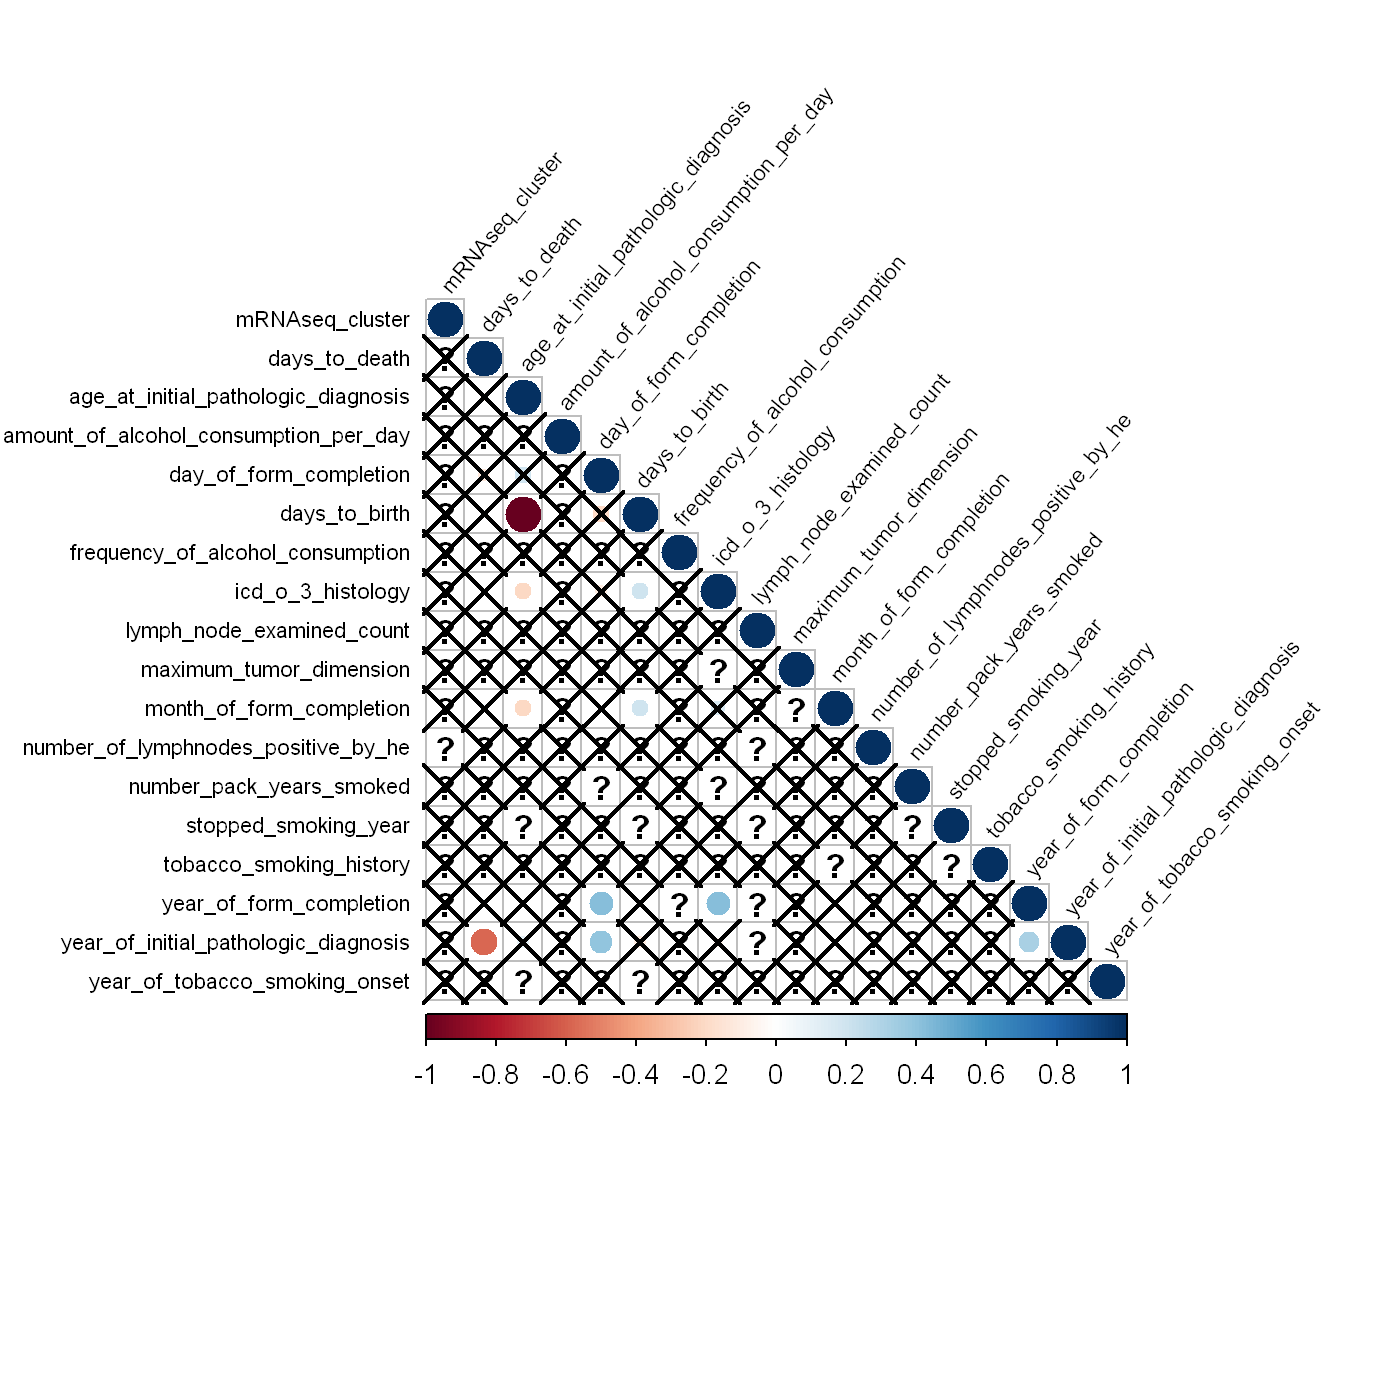

In [27]:
cor_dead <- cor.mtest(df_patient_dead, conf.level = 0.95)
M <- cor(df_patient_dead)
corrplot(M, type = "lower", 
         tl.col = "black", tl.srt = 50, tl.cex=0.65, p.mat = cor_dead$p, sig.level = .05)


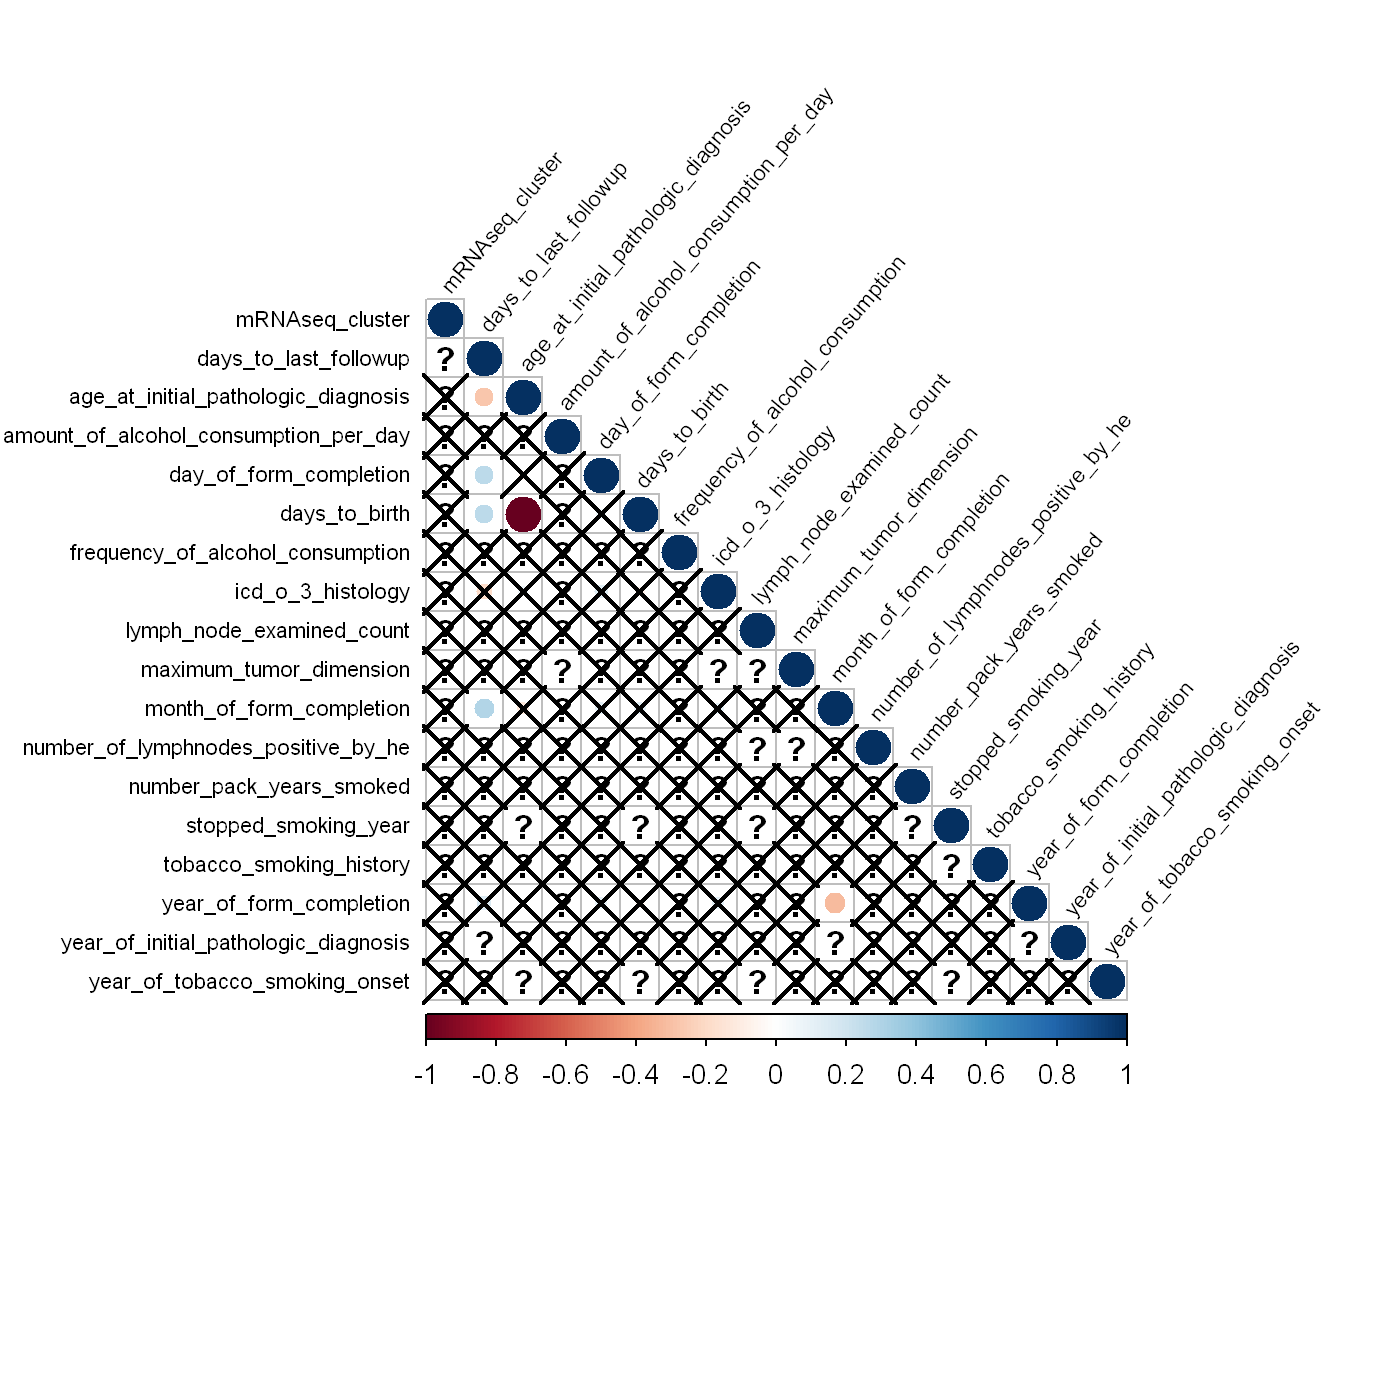

In [28]:
cor_alive <- cor.mtest(df_patient_alive, conf.level = 0.95)
M <- cor(df_patient_alive)
corrplot(M, type = "lower", 
         tl.col = "black", tl.srt = 50, tl.cex=0.65, p.mat = cor_alive$p, sig.level = .05)

After controlling for non significant correlation, the only significant relations seems to be
positive for icd_o_3_histology and days_to_birth
negative for age_at_initial_pathologic_diagnosis and days_to_birth

#### The most correlated features in the Patient Dataset seem to be ...

## Correlation - Pearson - Expression Dataset

In [29]:
# Perform PEARSON correlation
corrExpression <- rcorr(as.matrix(t_expression_data))

# Transform Data for easy plotting
corrExpression_plot[is.na(corrPatient_plot)] <- 0
head(corrExpression_plot,5)

ERROR: Error in corrExpression_plot[is.na(corrPatient_plot)] <- 0: Objekt 'corrExpression_plot' nicht gefunden


### Table of correlations

In [ ]:
# Provide a Table of correlations with p-values
dffcE <- flattenCorrMatrix(corrExpression$r, corrExpression$P)
dffcE %>% filter(dffcE[4] >= 0.7 | dffcE[4] <= -0.7)

### Plot

In [ ]:
# I would use only the most correlated ones from the previous table.


#### The most correlated features in the Expression Dataset seem to be ...


### --------------------------------------------------------------------------------------------------------------------------------------------------------------

## Clustering Analysis

In [9]:
em <- as.matrix(t_expression_data)
tem <- t(em)
colnames(tem) <- paste0("Cell", 1:ncol(tem))
tem

,Cell1,Cell2,Cell3,Cell4,Cell5,Cell6,Cell7,Cell8,Cell9,Cell10,⋯,Cell174,Cell175,Cell176,Cell177,Cell178,Cell179,Cell180,Cell181,Cell182,Cell183
SLC35E2,7.45,8.1,7.2,8.0,7.65,8.1,8.2,8.2,7.55,8.45,⋯,8.45,7.95,8.3,8.05,8.2,7.25,7.4,7.35,7.2,9.05
A1BG,6.40,5.8,6.4,5.8,6.70,6.6,6.3,6.5,5.70,6.30,⋯,7.10,7.10,6.7,7.00,6.9,7.10,7.3,7.90,6.0,6.90
A1CF,4.70,5.7,3.0,5.1,4.40,4.2,1.6,6.8,6.00,NaN,⋯,5.40,6.40,6.5,4.40,3.3,3.60,6.2,1.20,4.9,2.00
A2BP1,-1.00,1.1,NaN,NaN,0.10,NaN,NaN,1.7,0.40,-1.50,⋯,3.50,1.30,-0.3,NaN,2.1,2.00,0.0,NaN,2.0,NaN
A2LD1,7.50,6.8,7.3,7.5,7.40,6.6,7.1,6.8,8.00,5.80,⋯,6.50,7.30,6.1,6.70,6.5,6.70,6.7,6.50,6.9,6.70
A2ML1,6.40,NaN,10.8,4.1,9.30,9.8,6.2,3.8,2.30,10.10,⋯,0.10,3.40,3.7,-0.90,3.6,1.00,2.8,10.50,3.1,5.10
A2M,14.30,14.0,13.1,13.8,14.60,13.3,13.4,14.2,13.90,11.90,⋯,14.50,14.30,14.5,14.20,14.3,14.90,14.5,13.00,12.1,13.30
A4GALT,10.60,10.2,10.1,8.6,10.10,9.3,9.5,8.4,8.40,7.90,⋯,9.10,9.50,10.0,9.50,9.1,10.50,9.8,10.80,8.3,9.00
A4GNT,8.80,5.6,0.2,3.2,5.70,2.6,5.1,6.9,4.30,-0.50,⋯,4.10,5.20,4.4,5.60,5.8,2.70,4.3,0.80,6.6,2.20
AAA1,1.00,-1.2,0.2,-0.1,NaN,4.2,NaN,2.5,1.40,NaN,⋯,1.90,NaN,1.7,-0.90,NaN,1.30,1.8,NaN,1.8,NaN


In [10]:
# Create seurat container and keep all genes that are expressed in at least 3 patients
rna <- CreateSeuratObject(counts = tem, assay = "RNA", min.cells=3)
rna

An object of class Seurat 
14098 features across 183 samples within 1 assay 
Active assay: RNA (14098 features, 0 variable features)

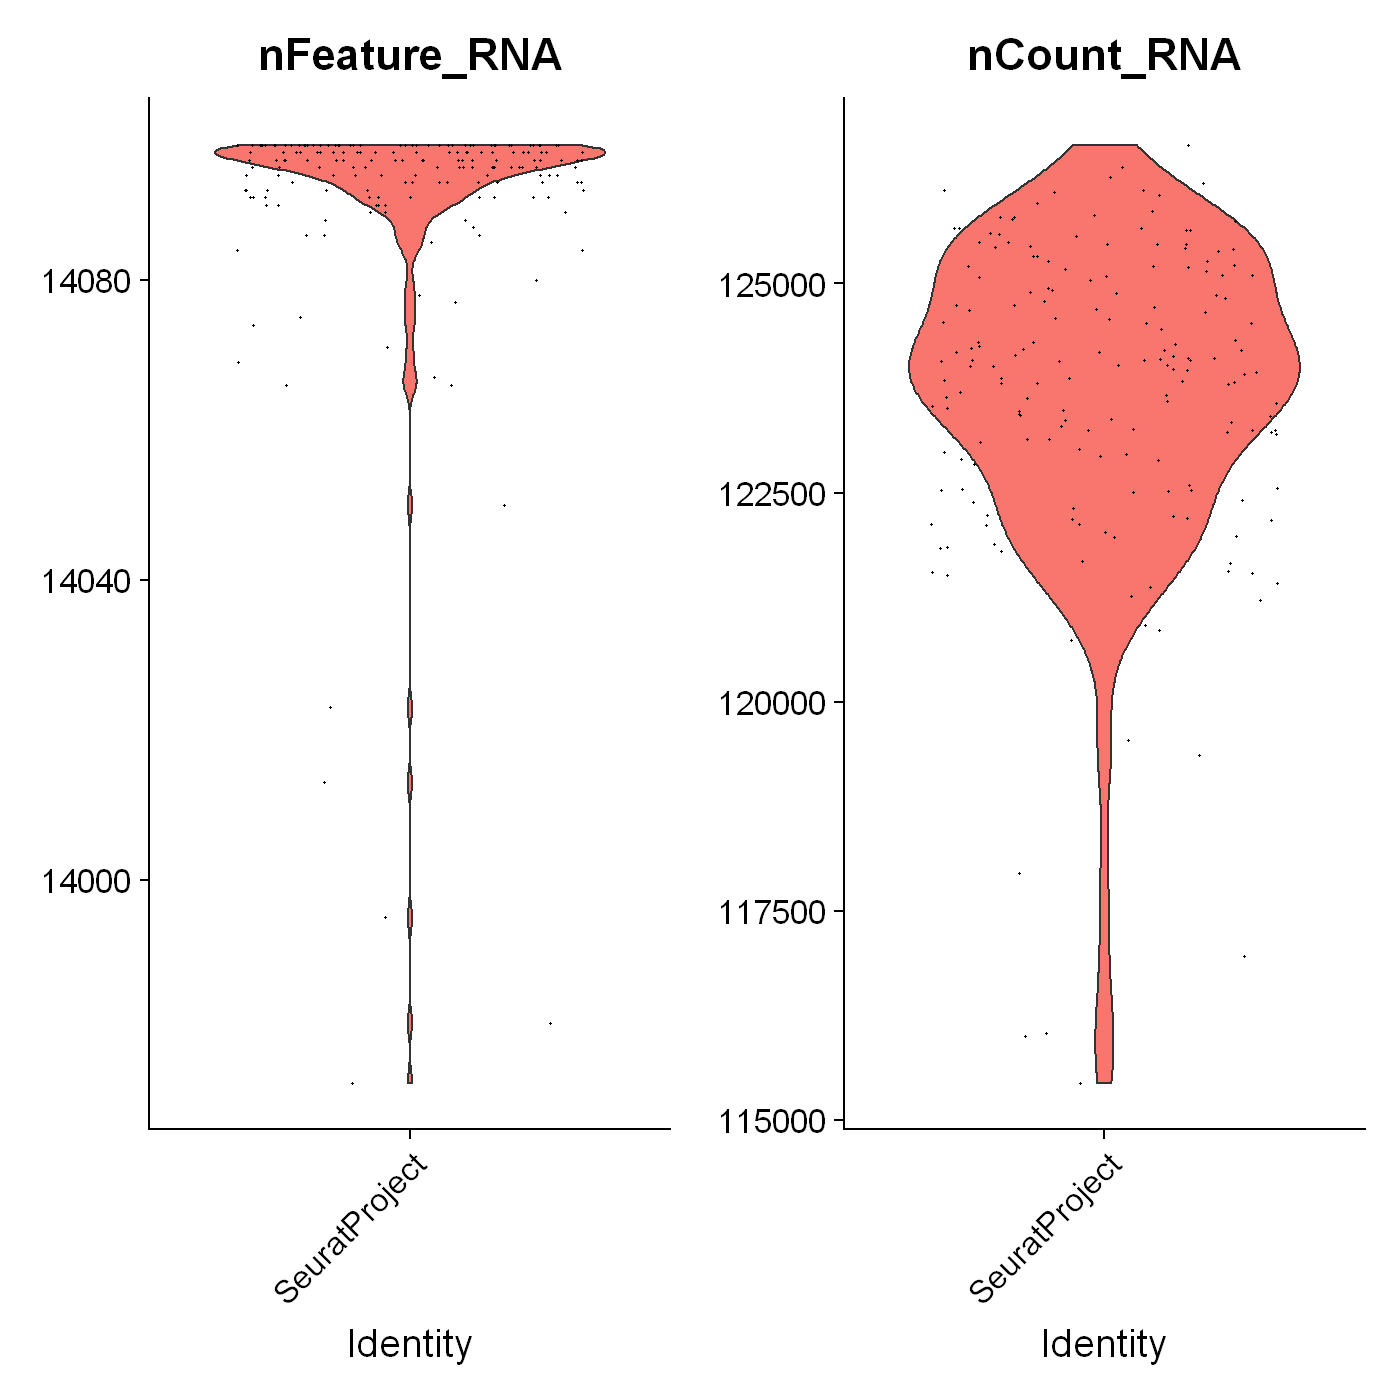

In [33]:
# visualize gene and molecule counts
VlnPlot(object = rna, features = c("nFeature_RNA", "nCount_RNA"), ncol = 2)

Visualizing gene and molecule counts is important. In particular, it could be used to define a cut off value. This is nicely depicted in the n_feature_RNA and n_count_RNA since one could implement a cut_off value around 14'080 in the former and around 121'500 in the latter. 

In [ ]:
# data is already normalized
#pbmc <- NormalizeData(object = rna, normalization.method = "LogNormalize", scale.factor = 10000)
#pbmc

Normalizing the data is often necessary for removing technological factors, such as human imprecision, that could create differences. Indeed, we would like to keep only the biological differences. 

Detect variable genes (calculates the average expression and dispersion for each gene, 
places these genes into bins, and then calculates a z-score for dispersion within each bin) 
--> control for the relationship between variability and average expression
focus on these genes during downstream analysis

In [12]:
pbmc <- FindVariableFeatures(object = rna, mean.function = ExpMean, dispersion.function = LogVMR, x.low.cutoff = 0.0125, x.high.cutoff = 3, y.cutoff = 0.5, nfeatures = 2000)
# see the most variable genes
head(x = HVFInfo(object = pbmc))

Warning message:
“The following arguments are not used: x.low.cutoff, x.high.cutoff, y.cutoff”


,mean,variance,variance.standardized
,<dbl>,<dbl>,<dbl>
SLC35E2,7.902732,0.3589760,0.6880759
A1BG,6.396721,1.1709782,1.2174259
A2LD1,6.849727,0.5102060,0.6197994
A2M,13.808743,0.8046484,1.7649664
A4GALT,9.062295,0.9834606,2.7936585
AAAS,9.377596,0.1343854,0.3908778


In [ ]:
#?FindVariableFeatures

There are no mitochondrial genes present in the data set. They were removed during the study from which the dataset stems from.
Mitochondrial genes are often used to detect damaged cells, which should be excluded during analysis. 

In [ ]:
mito.genes <- grep(pattern = "^MT-", x = rownames(pbmc@assays[["RNA"]]), value = TRUE)
mito.genes

In [ ]:
 #grep(pattern = "^MT-", x = rownames(tem), value = TRUE)

Regress out cell-cell variation in gene expression driven by batch, cell alignment rate and 
the number of detected molecules

In [15]:
pbmc <- ScaleData(object = pbmc, vars.to.regress = c("nCount_RNA", "nFeature_RNA"))

Regressing out nCount_RNA, nFeature_RNA

Centering and scaling data matrix



## Principal Component Analysis

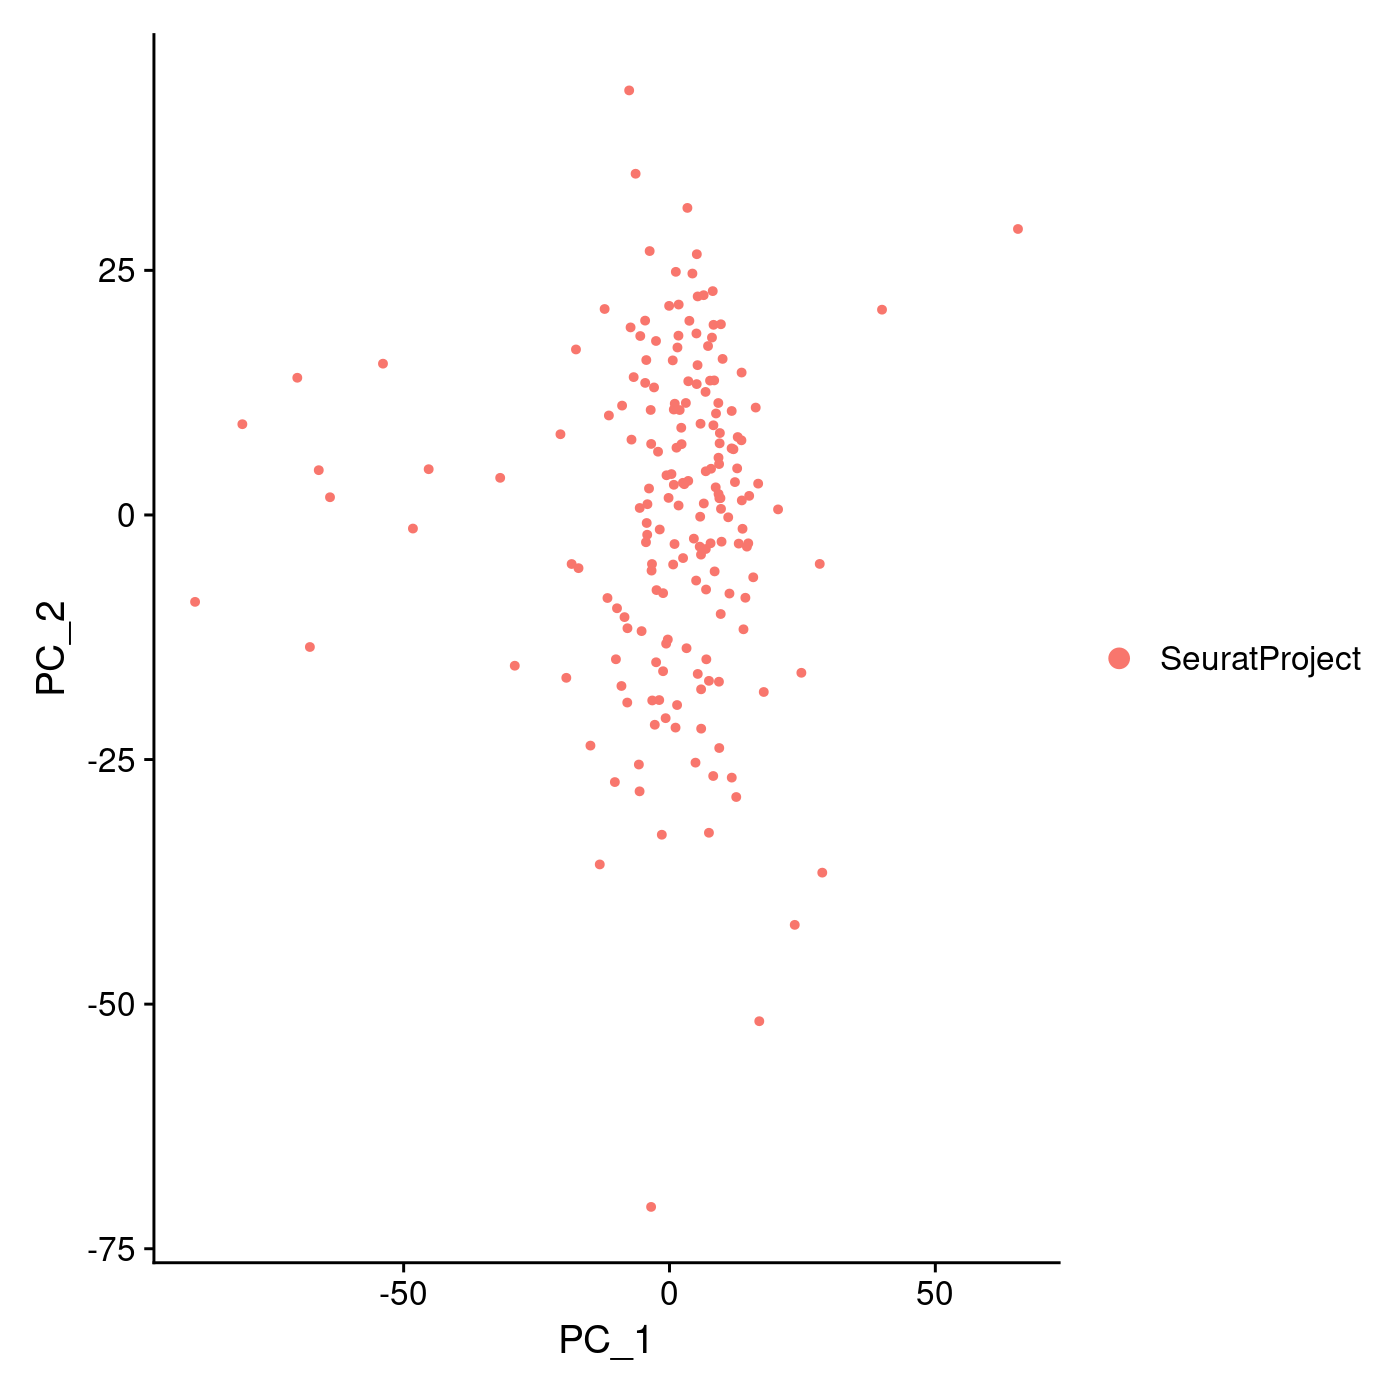

In [26]:
pbmc <- RunPCA(object = pbmc,  npcs = 50, verbose = FALSE)
DimPlot(object = pbmc, reduction = "pca")

There are is only one cluster of patients present, but they still may be sorted by variables from the meta data (live/dead, position of the tumor, staging of the tumor etc.)

## Graph based clustering

In [37]:
pbmc <- FindNeighbors(pbmc, reduction = "pca", dims = 1:50)
pbmc <- FindClusters(pbmc, resolution = 0.65, algorithm = 1)

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 183
Number of edges: 9098

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.4256
Number of communities: 2
Elapsed time: 0 seconds


### Using the resolution 0.65, two clusters were found --> we can compare gene expression between them

In [38]:
pbmc <- RunUMAP(pbmc, reduction = "pca", dims = 1:20)

Warning message:
"The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session"
18:01:13 UMAP embedding parameters a = 0.9922 b = 1.112

18:01:13 Read 183 rows and found 20 numeric columns

18:01:13 Using Annoy for neighbor search, n_neighbors = 30

18:01:13 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

18:01:13 Writing NN index file to temp file C:\Users\lilit\AppData\Local\Temp\RtmpgF1Ufg\file153c646494d

18:01:13 Searching Annoy index using 1 thread, search_k = 3000

18:01:14 Annoy recall = 100%

18:01:15 Commencing smooth kNN distance calibration using 1 thread

### Clusters visualization

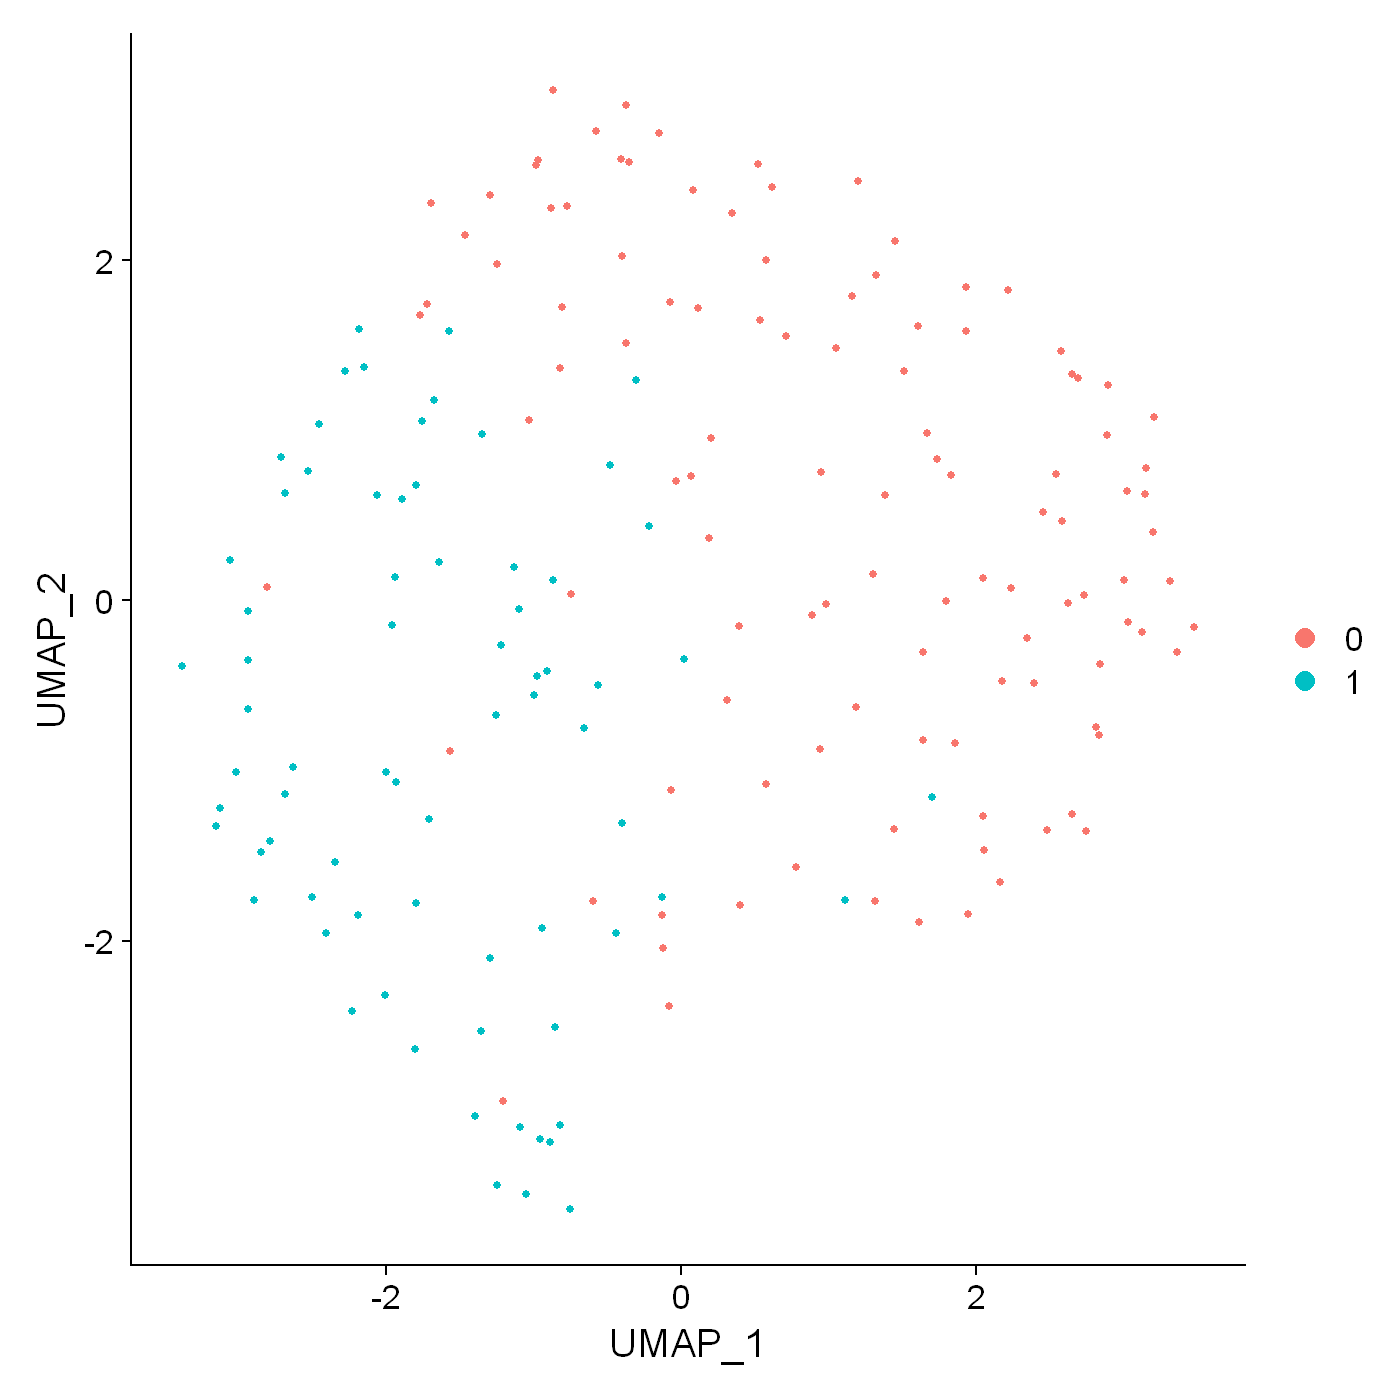

In [39]:
#DimPlot(pbmc, reduction = "umap", split.by = "seurat_clusters")
DimPlot(pbmc, reduction = "umap")

## Differential Expression between the clusters
### Differential expression identifies positive and negative markers of a single cluster

### Markers of cluster 0

In [40]:
# find all markers of cluster 0
cluster1.markers <- FindMarkers(object = pbmc, ident.1 = 0, min.pct = 0.25, logfc.threshold=0.25)
print(x = head(x = cluster1.markers, n = 5))

For a more efficient implementation of the Wilcoxon Rank Sum Test,
(default method for FindMarkers) please install the limma package
--------------------------------------------
install.packages('BiocManager')
BiocManager::install('limma')
--------------------------------------------
After installation of limma, Seurat will automatically use the more 
efficient implementation (no further action necessary).
This message will be shown once per session



               p_val avg_log2FC pct.1 pct.2    p_val_adj
TJP3    5.515860e-19  2.0576161     1     1 7.776259e-15
GRTP1   1.051500e-18  1.7098470     1     1 1.482405e-14
MICALL2 8.498715e-18  1.1340897     1     1 1.198149e-13
TRPM4   3.392632e-17  1.5406666     1     1 4.782933e-13
C2orf29 4.335173e-17  0.6317662     1     1 6.111727e-13


In [ ]:
#cluster1.markers[order(-cluster1.markers$avg_logFC),]

The genes "TJP3", "GRTP1", "MICALL2", "TRPM4" and "C2orf29" show a higher expression in cluster 0 which can also be seen in the violin plots below.

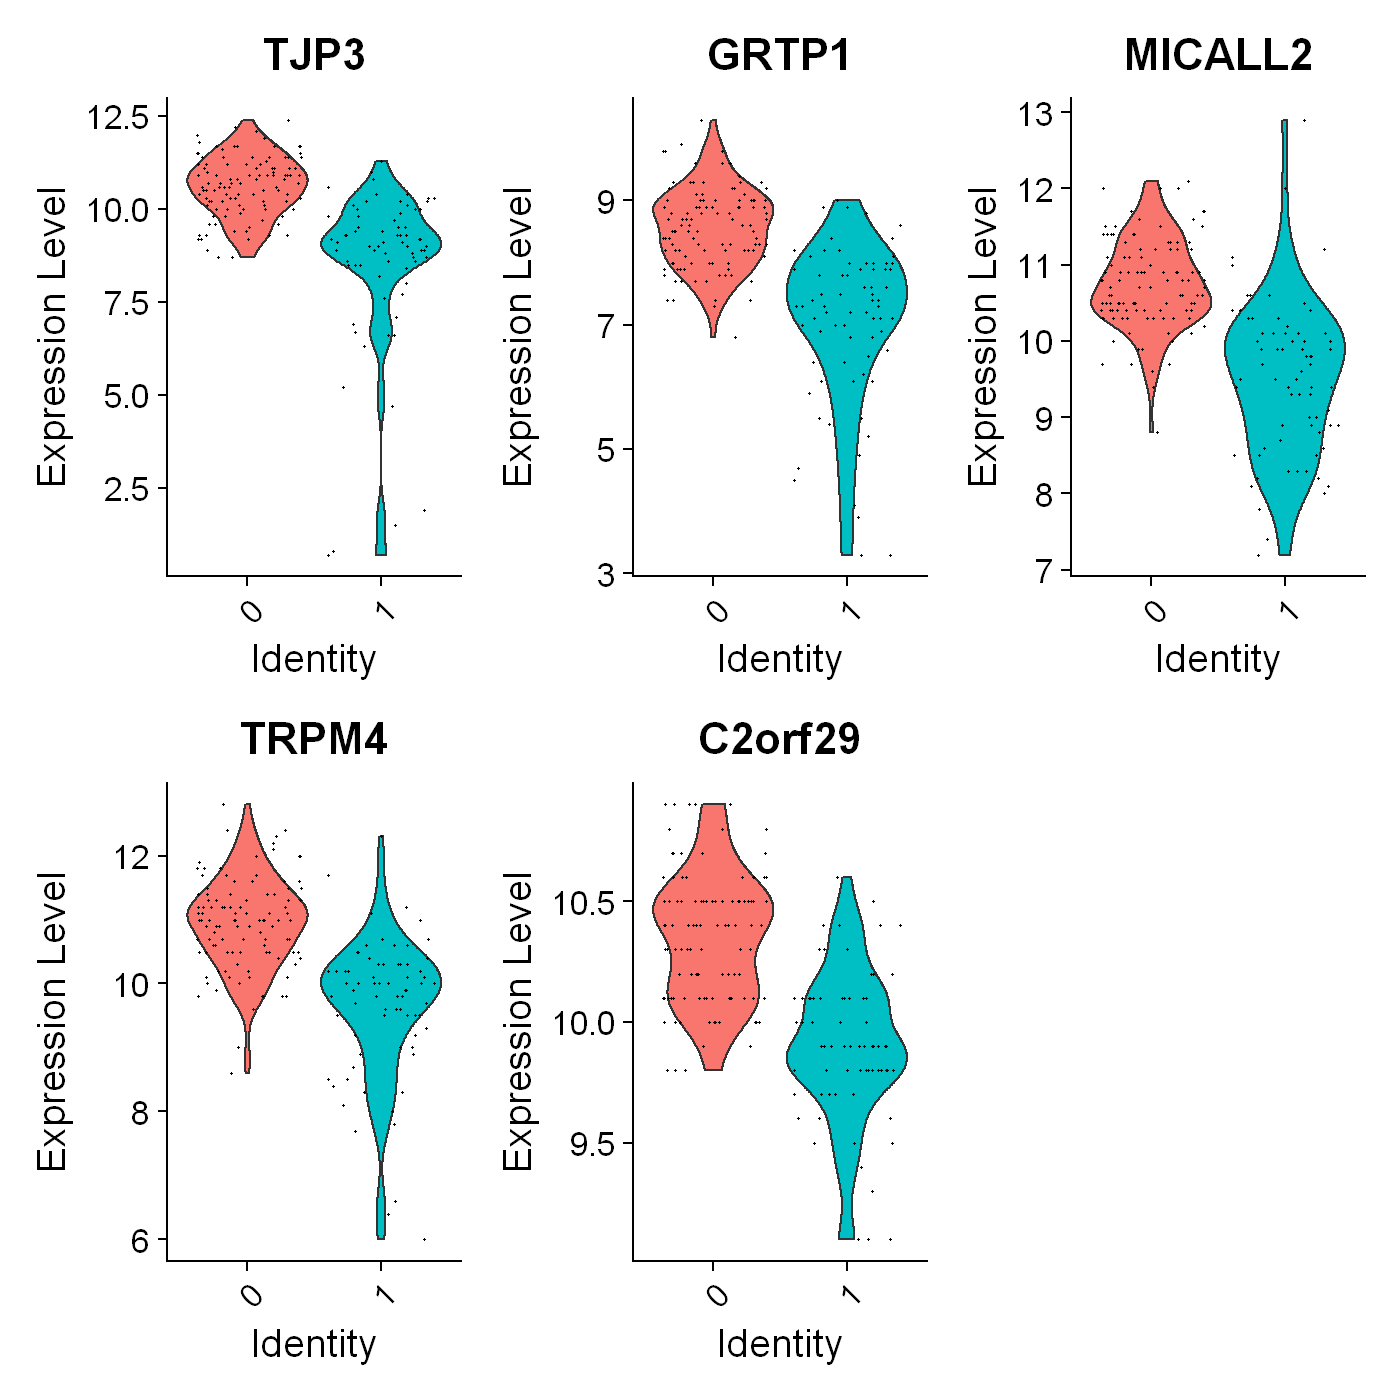

In [43]:
VlnPlot(object = pbmc, features =c("TJP3", "GRTP1", "MICALL2", "TRPM4", "C2orf29"))

### Markers of cluster 1

In [46]:
# find all markers of cluster 1
cluster2.markers <- FindMarkers(object = pbmc, ident.1 = 1, min.pct = 0.25, logfc.threshold=0.25)
print(x = head(x = cluster2.markers, n = 5))

               p_val avg_log2FC pct.1 pct.2    p_val_adj
TJP3    5.515860e-19 -2.0576161     1     1 7.776259e-15
GRTP1   1.051500e-18 -1.7098470     1     1 1.482405e-14
MICALL2 8.498715e-18 -1.1340897     1     1 1.198149e-13
TRPM4   3.392632e-17 -1.5406666     1     1 4.782933e-13
C2orf29 4.335173e-17 -0.6317662     1     1 6.111727e-13


In [72]:
subset <- cluster2.markers[ which(cluster2.markers$p_val_adj < 0.05),]
subset <- subset[order( -subset$avg_log2FC),]
head(subset, n = 5)

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ADCY1,4.344711e-07,4.571088,1,1.000,6.125173e-03
ATP8A2,4.145916e-07,4.242175,1,0.991,5.844912e-03
P2RX5,9.899312e-07,3.822413,1,1.000,1.395605e-02
PEG3,4.518524e-07,3.691666,1,1.000,6.370215e-03
GPX3,5.175068e-09,3.541853,1,1.000,7.295811e-05


The genes "ADCY1", "ATP8A2", "P2RX5", "PEG3" and "GPX3" show a higher expression in cluster 1 which can also be seen in the violin plots below.

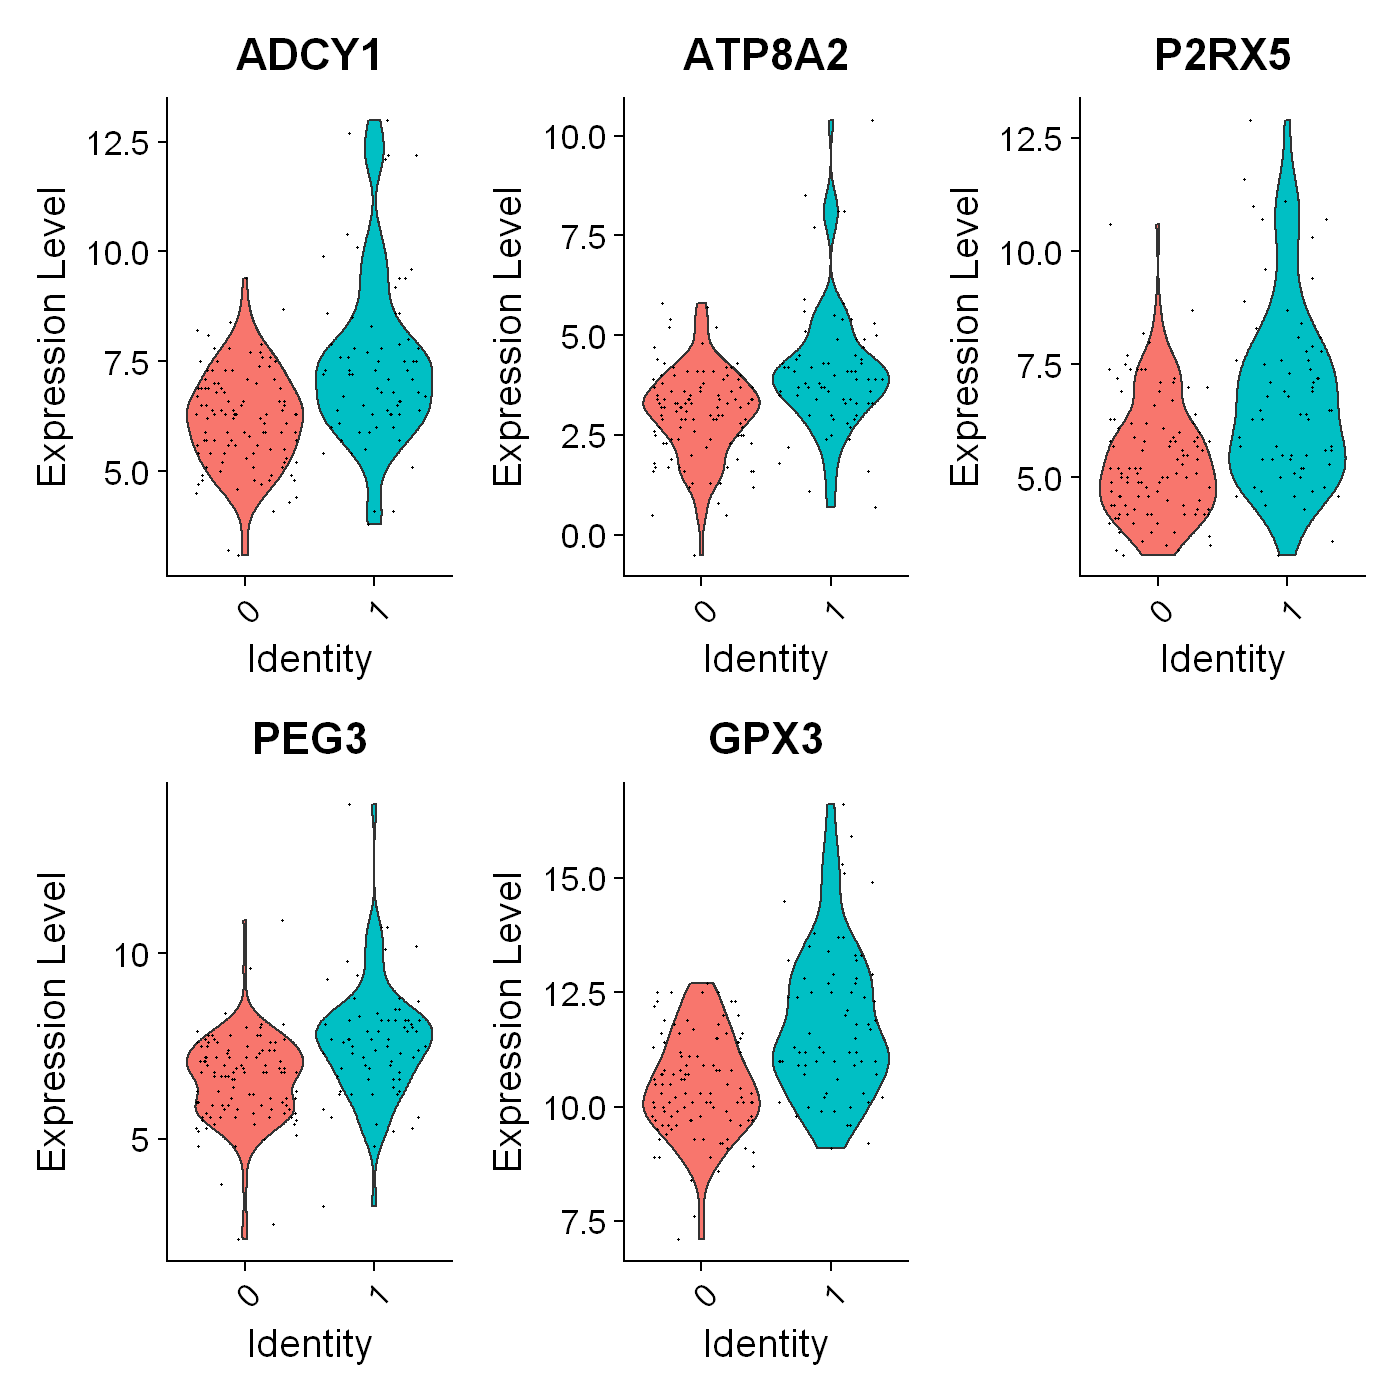

In [74]:
VlnPlot(object = pbmc, features =c("ADCY1", "ATP8A2", "P2RX5", "PEG3", "GPX3"))

In [ ]:
# find all markers of cluster 3
#cluster3.markers <- FindMarkers(object = pbmc, ident.1 = 2, min.pct = 0.25, logfc.threshold=0.25)
#print(x = head(x = cluster3.markers, n = 5))

In [ ]:
#VlnPlot(object = pbmc, features =c("GRTP1", "PRKD1", "ANXA6", "ANGPTL2", "DLC1", "FBXL19"))

## Color by metadata

### histological_type

In [23]:
hist_clusters <- as.factor(t_patient_data$histological_type)
pbmc <- AddMetaData(pbmc, hist_clusters, col.name="hist_clusters")

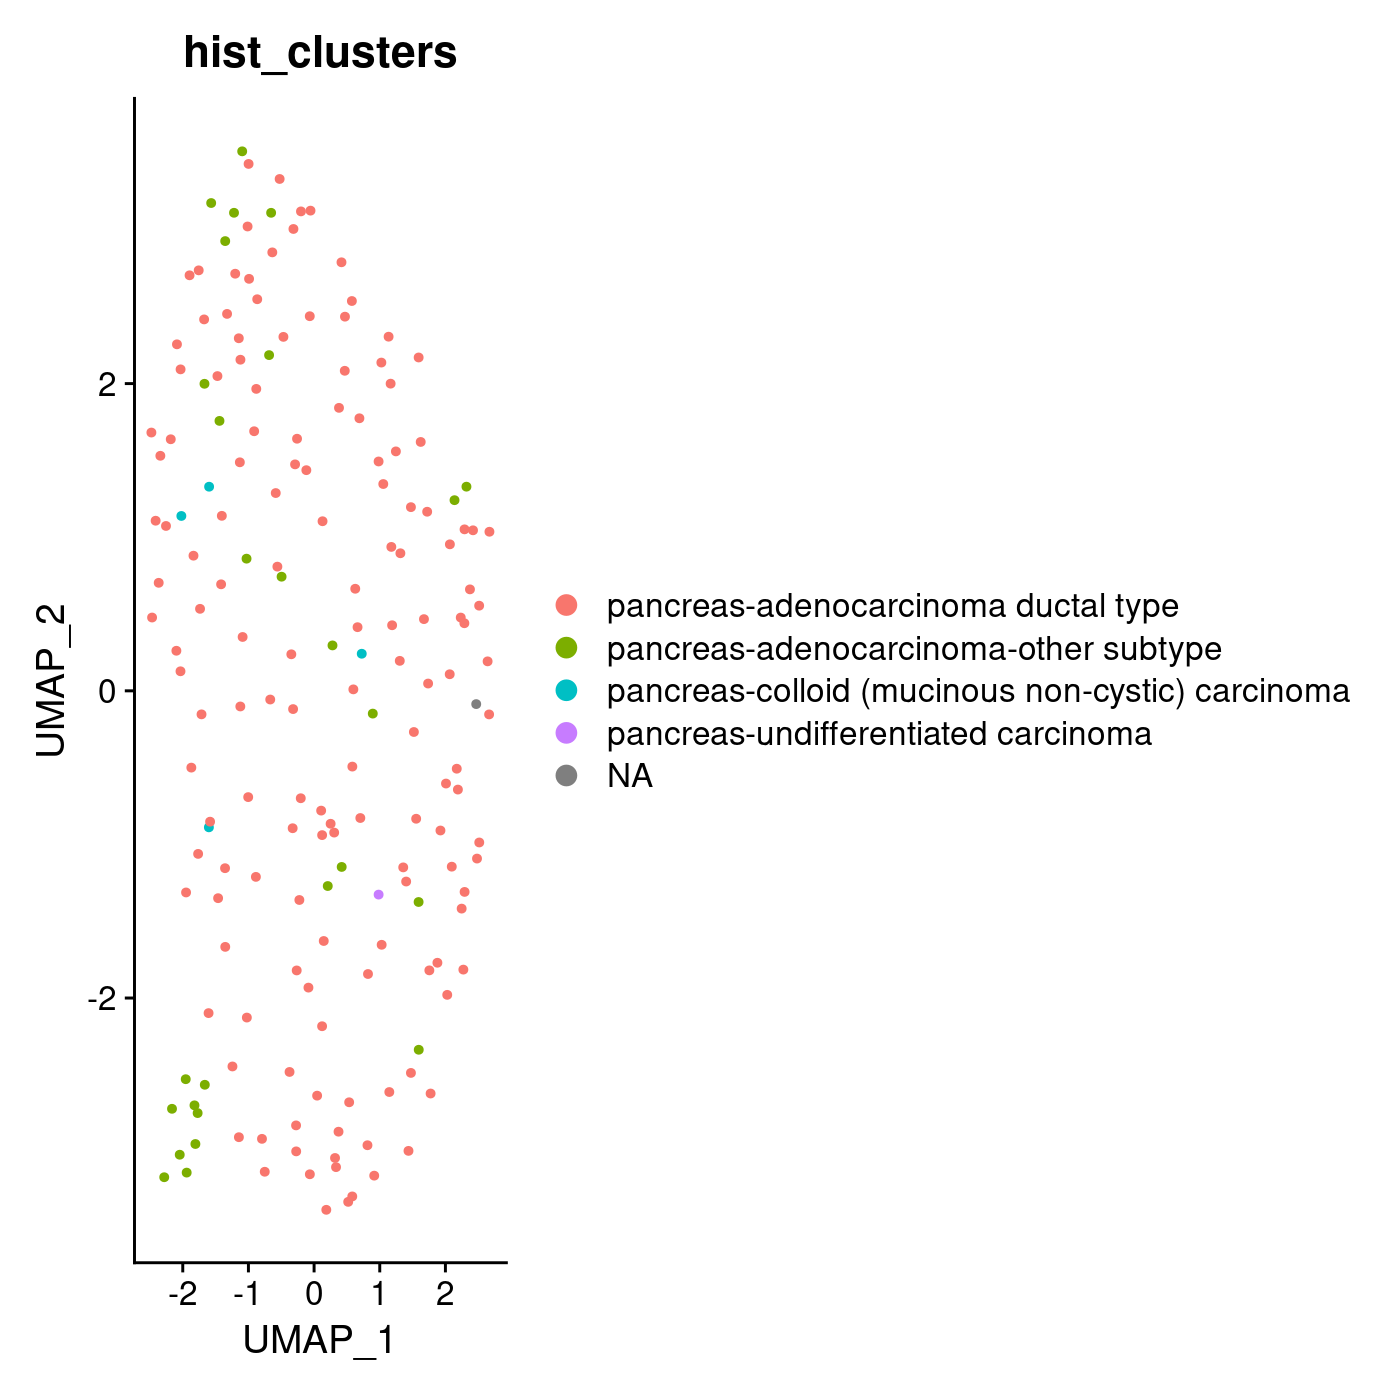

In [27]:
DimPlot(pbmc, reduction = "umap", group.by = "hist_clusters")

In [ ]:
#pbmc <- RunUMAP(pbmc, reduction = "pca", dims = 1:20)
#pbmc$seurat_clusters <- as.factor(t_patient_data$histological_type)
#DimPlot(pbmc, reduction = "umap", group.by = pbmc$seurat_clusters)

### pathologic_stage

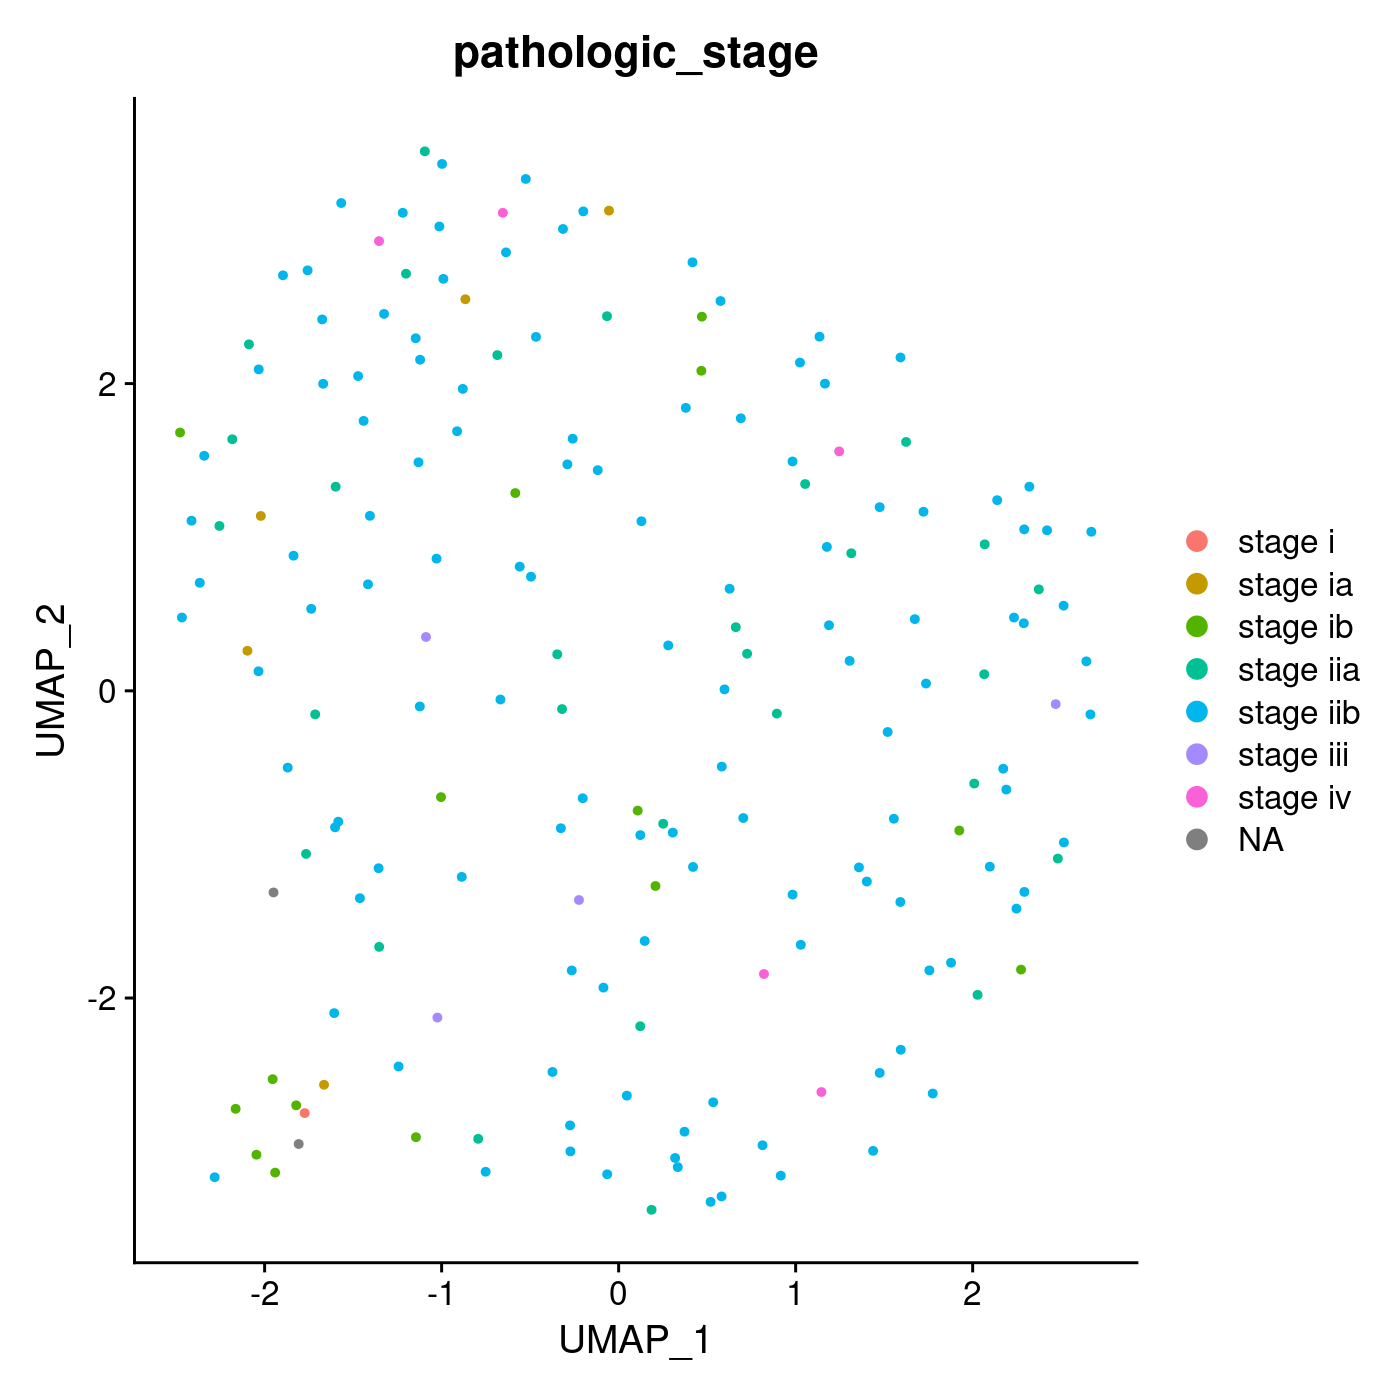

In [32]:
pathologic_stage_clusters <- as.factor(t_patient_data$pathologic_stage)
pbmc <- AddMetaData(pbmc, pathologic_stage_clusters, col.name="pathologic_stage")
DimPlot(pbmc, reduction = "umap", group.by = "pathologic_stage")

### tissue_source_site

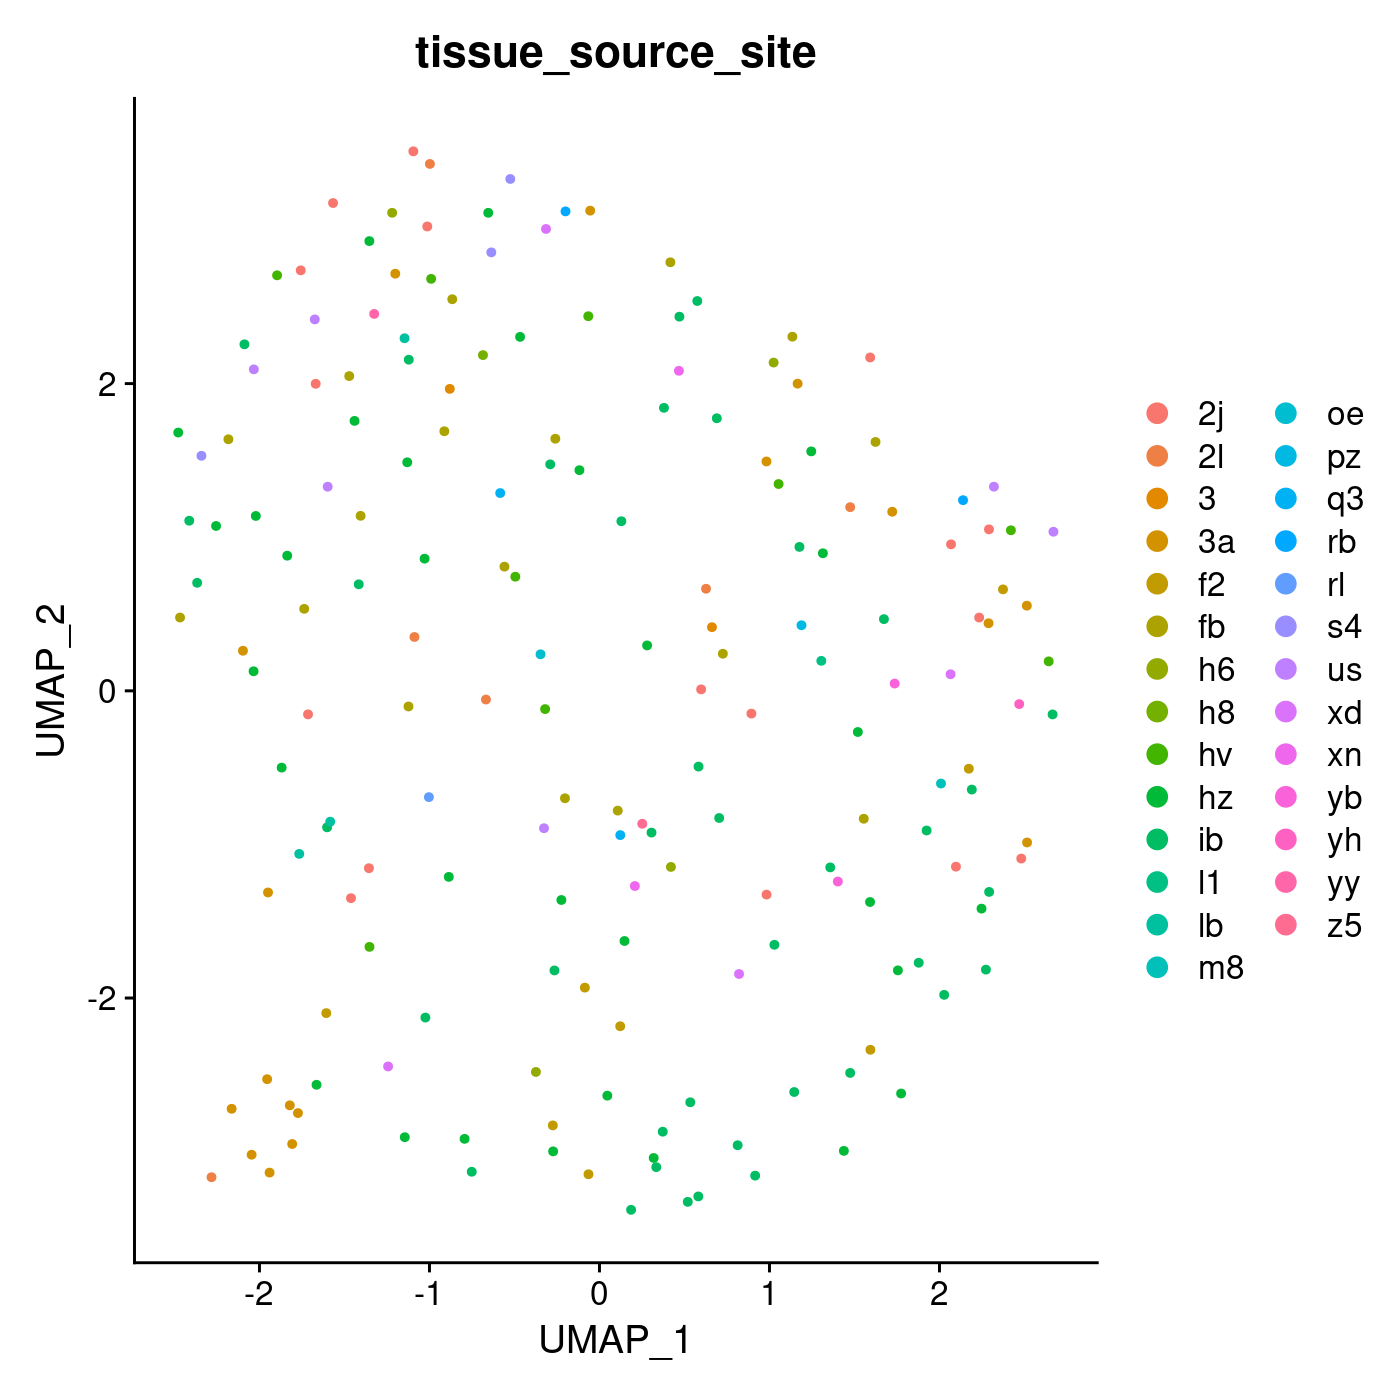

In [33]:
tissue_source_site_clusters <- as.factor(t_patient_data$tissue_source_site)
pbmc <- AddMetaData(pbmc, tissue_source_site_clusters, col.name="tissue_source_site")
DimPlot(pbmc, reduction = "umap", group.by = "tissue_source_site")

In [82]:
?DimPlot

## References

#### 01 - Baek, B., Lee, H. Prediction of survival and recurrence in patients with pancreatic cancer by integrating multi-omics data. Sci Rep 10, 18951 (2020). https://doi.org/10.1038/s41598-020-76025-1